<a href="https://colab.research.google.com/github/agustinbrusco/Physics-and-Math-Plots/blob/main/Bloc_de_Notas_F%C3%ADsica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\text{Física 4}$

Profesor: [Diego Wisniacki](wisniacki@gmail.com)

JTP: [Darío Mitnik](dmitnik@df.uba.ar)

Ay 1: [Milton Aguilar](mil@df.uba.ar)

Ay 2: [Lucas Longo](lucaslongo52@gmail.com)


In [ ]:
#@title Imports y formato
import numpy as np  # Cálculo numérico
import sympy as sym  # Cálculo simbólico
import scipy.constants as cte  # Constantes de la naturaleza
import matplotlib.pyplot as plt  # Graficos
import plotly.express as px  # Graficos 2D Interactivos
import plotly.graph_objects as go  # Graficos 3D Interactivos
# Cuestiones esteticas con Matplotlib:
from matplotlib.colors import Normalize, Colormap  # Para el coloreo dinamico
from matplotlib.patches import Polygon  # Para pintar regiones del plano
from matplotlib import rcParams  # Para aumentar la resolución de los gráficos de Matplot
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 150
rcParams['axes.grid'] = True
rcParams['legend.fontsize'] = 9


# Para graficar superficies en 3D de forma interactiva
# !pip install jupyter-dash -q
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input

# Esto es para que las cosas se impriman en Latex y todes podamos ser felices
sym.init_printing()

In [ ]:
#@title constantes variasy algunas funciones:

# Unidades: (dicts que armé hace bocha pero que al final no uso)
# unitsl = {'km': 1e3, 'm': 1, 'dm': 1e-1, 'cm': 1e-2, 'mm': 1e-3, 'um': 1e-6,
#           'mi': 1609.34, 'yd': 0.9144, 'ft': 0.3048, 'in': 0.0254}
# unitsv = {'m^3': 1, 'dm^3': 1e-3, 'cm^3': 1e-6, 'mm^3': 1e-9, 'um^3': 1e-18,
#           'l': 1e-3, 'ml': 1e-6, 'cup': 2.5e-4, 'ft^3': 2.831647e-2}
# unitsm = {'t': 1e6, 'kg': 1e3, 'g': 1, 'cg': 1e-2, 'mg': 1e-3, 'ug': 1e-6,
#           'u': 1.6605402e-24, 'lb': 4.5359237e2, 'oz': 28349523125e1}
# unitst = {'y': 31540000, 'd': 86400, 'h': 3600, 'min': 60, 's': 1, 'ms': 1e-3,
#           'us': 1e-6}
Kelvin = lambda t: cte.convert_temperature(t, 'Celsius', 'Kelvin')
Celsius = lambda t: cte.convert_temperature(t, 'Kelvin', 'Celsius')


print('k =', cte.physical_constants['Boltzmann constant'])
print('R =', cte.physical_constants['molar gas constant'])
print('N_A =', cte.physical_constants['Avogadro constant'])
print('1 atm =', cte.physical_constants['standard atmosphere'])

k = (1.380649e-23, 'J K^-1', 0.0)
R = (8.314462618, 'J mol^-1 K^-1', 0.0)
N_A = (6.02214076e+23, 'mol^-1', 0.0)
1 atm = (101325.0, 'Pa', 0.0)


##Guía 1: Diferenciales

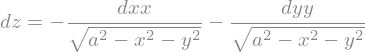

In [ ]:
#@title 1.c)
dx, dy, dz = sym.symbols('dx, dy, dz')
expr = 'sqrt(a**2 - x**2 - y**2)'
z = sym.sympify(expr)
display(z)
display(sym.Eq(dz, (z.diff('x'))*dx + (z.diff('y'))*dy))

In [ ]:
#@title 3.a) y 3.b)
a, b, R = sym.symbols('a, b, R', real=True, positive=True)
p, T, v = sym.symbols('p, T, v', real=True)
n = sym.symbols('n', integer=True)
# Van del Waals
expr = 'Eq(p, R*T/(v-b) - a/v**2)'
van_der_waals = sym.sympify(expr).subs({'a': a, 'b': b, 'R': R,
                                        'p': p, 'T': T, 'v': v})
# display(van_der_waals)
# p_sol = []
# for sol in sym.solveset(van_der_waals, p):
#     p_sol.append(sol)
# # v_sol = []
# # for sol in sym.solveset(van_der_waals, v):
# #     v_sol.append(sol)
# T_sol = []
# for sol in sym.solveset(van_der_waals, T):
#     T_sol.append(sol)
# p_sol[0].diff(v), T_sol[0].diff(p)
# Gas Ideal
expr = 'Eq(p*v, n*R*T)'
ideal_gas = sym.sympify(expr).subs({'a': a, 'b': b, 'R': R, 'n': n,
                                    'p': p, 'T': T, 'v': v})
# display(ideal_gas)
# for sol in sym.solveset(ideal_gas, p):
#     p_sol = sol
# for sol in sym.solveset(ideal_gas, v):
#     v_sol = sol
# for sol in sym.solveset(ideal_gas, T):
#     T_sol = sol
# display(p_sol.diff(v)*v_sol.diff(T)*T_sol.diff(p))

In [ ]:
#@title 4.b)
# Datos
d_e = 5  # cm
d_a = 4.995  # cm
alfa_e = 1.9e-6  # °C⁻¹
alfa_a = 1.1e-5  # °C⁻¹
T = 25  # °C
# Calentando solo el anillo.
T_f = (d_e - d_a)/(alfa_a*d_a) + T
print(f'Calentando solo el anillo, se debe alcanzar una temperatura de {T_f:.3g} °C')
# Calentando solo la esfera.
T_f = (d_a - d_e)/(alfa_e*d_e - alfa_a*d_a) + T
print('Calentando el anillo y la esfera a la vez,' +
      f'se debe alcanzar una temperatura de {T_f:.3g} °C')

Calentando solo el anillo, se debe alcanzar una temperatura de 116 °C
Calentando el anillo y la esfera a la vez,se debe alcanzar una temperatura de 135 °C


In [ ]:
#@title 4.c)
V_0 = 40*cte.liter  # m³
h = 0.75  # m
A_0 = V_0/h  # m²
T_0 = 20  # °C
T_f = 35  # °C
Delta_T = T_f - T_0  # °C
beta_H2O = 207e-6  # °C⁻¹
beta_Al = 69e-6  # °C⁻¹

V_H2O = beta_H2O*Delta_T*V_0 + V_0  # m³
h_f = beta_Al/3*Delta_T*h + h  # m
A_f = beta_Al/2*Delta_T*A_0 + A_0  # m²
V_Al = h_f*A_f  # m³
print(f'El volumen final de agua, {V_H2O:.4g} m³, resultó mayor que el volumen final de su contenedor, {V_Al:.4g} m³.')
g = cte.g  # m/s²
rho_0 = 0.99802  # kg/m³
p_atm = cte.value('standard atmosphere')  # Pa
# La presión en el fondo del tacho al principio
p_0 = rho_0*g*h + p_atm  # Pa
rho_f = 0.99318  # kg/m³
# La presión en el fondo del tacho al final
p_f = rho_f*g*h_f + p_atm  # Pa
print(f'La presión final del agua en el fondo del tacho varió {p_f - p_0:.4g} Pa respecto de la presión inicial.')


El volumen final de agua, 0.04012 m³, resultó mayor que el volumen final de su contenedor, 0.04003 m³.
La presión final del agua en el fondo del tacho varió -0.03308 Pa respecto de la presión inicial.


In [ ]:
#@title 5$^{(***)}$.b
p = 0.35*cte.bar  # Pa = N/m²
T = cte.convert_temperature(80, 'Celsius', 'Kelvin')  # K
v = 4.625  # m³/kg
R = cte.R  # J/(mol.K) = N.m/(mol.K)
b = (R*T/p - v)*T**3  # K³.m³/kg

print(f'b = {b:.6g}  K³.m³/kg')

b = -2.00004e+08  K³.m³/kg


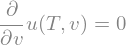

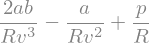

In [ ]:
#@title Ejercicio Diferenciales
T, v, R = sym.symbols('T, v, R', real=True)
u, p = sym.symbols('u, p', cls=sym.Function)
p = R*T/v
PDE = sym.Eq(u(T, v).diff(v), T*p.diff(T) - p)
display(PDE)
print()
# sym.solveset(PDE, u(T, v), domain=sym.S.Reals)
v, p, a, b, R = sym.symbols('v, p, a, b, R', real=True)
T = (v-b)*(p+a/v**2)/R
sym.expand(T.diff(v))

##Guía 2: Termometrı́a y Calorimetrı́a

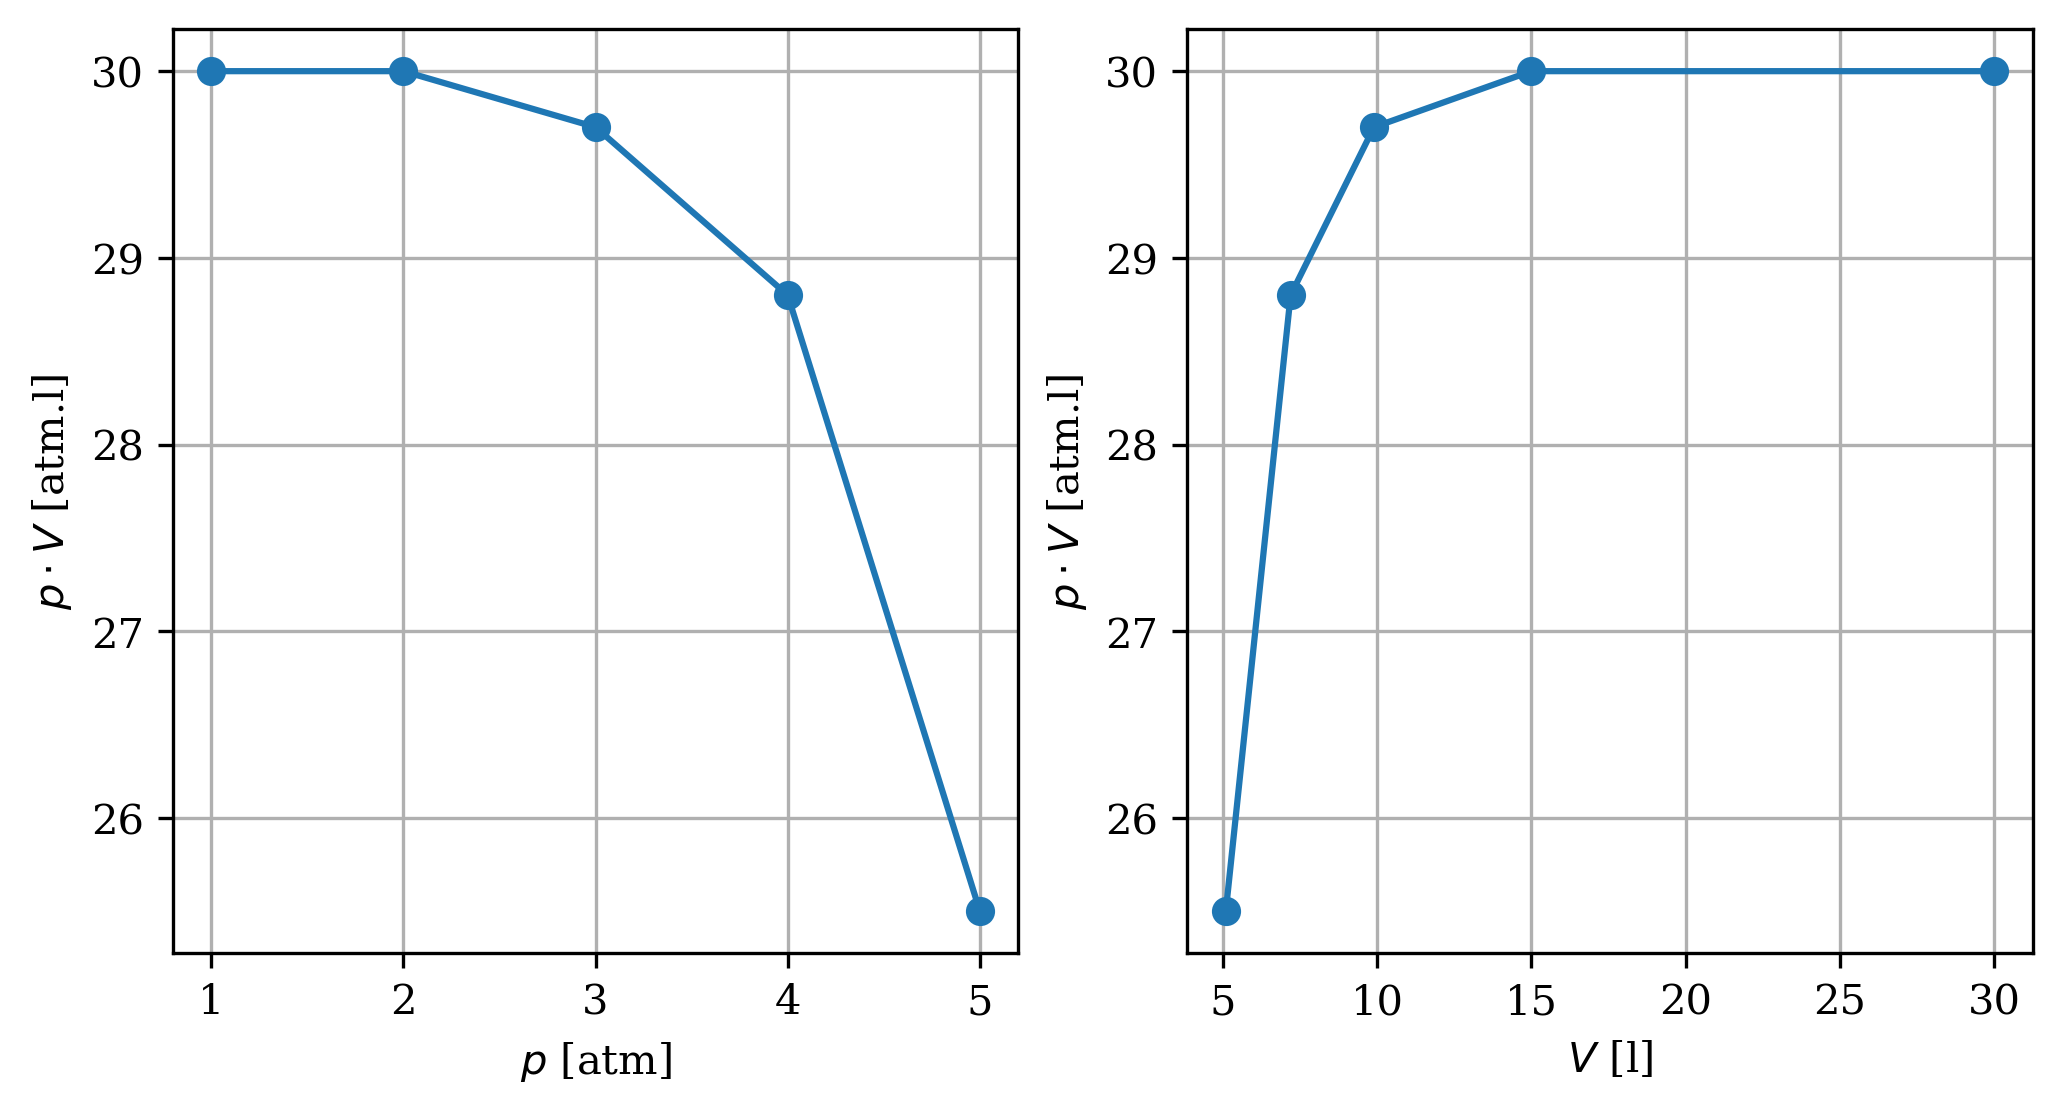

T = 92.4 °C


In [ ]:
#@title 1.a)
p = np.array([1, 2, 3, 4, 5])  # atm
V = np.array([30, 15, 9.9,  7.2, 5.1])  # l

plt.subplot(1, 2, 1)
plt.plot(p, p*V, '-o')
plt.grid()
plt.xlabel('$p$ [atm]')
plt.ylabel(r'$p \cdot V$ [atm.l]')
plt.subplot(1, 2, 2)
plt.plot(V, p*V, '-o')
plt.grid()
plt.xlabel('$V$ [l]')
plt.ylabel(r'$p \cdot V$ [atm.l]')
plt.show()

T_0 = cte.convert_temperature(p[0]*V[0]*cte.atm*1e-3/cte.R, 'Kelvin', 'Celsius')
print(f'T = {T_0:.3g} °C')

i) Los parametros son:
 R0 = 7.00 Ω
 a = 0.00392 °C⁻¹
 b = -5.94e-7 °C⁻2

ii) Los parametros son:
 m = 37.0 Ω⁻¹
 y0 = -259 °C
y se estima:
 Θ(18,387 Ω) = 421 °C


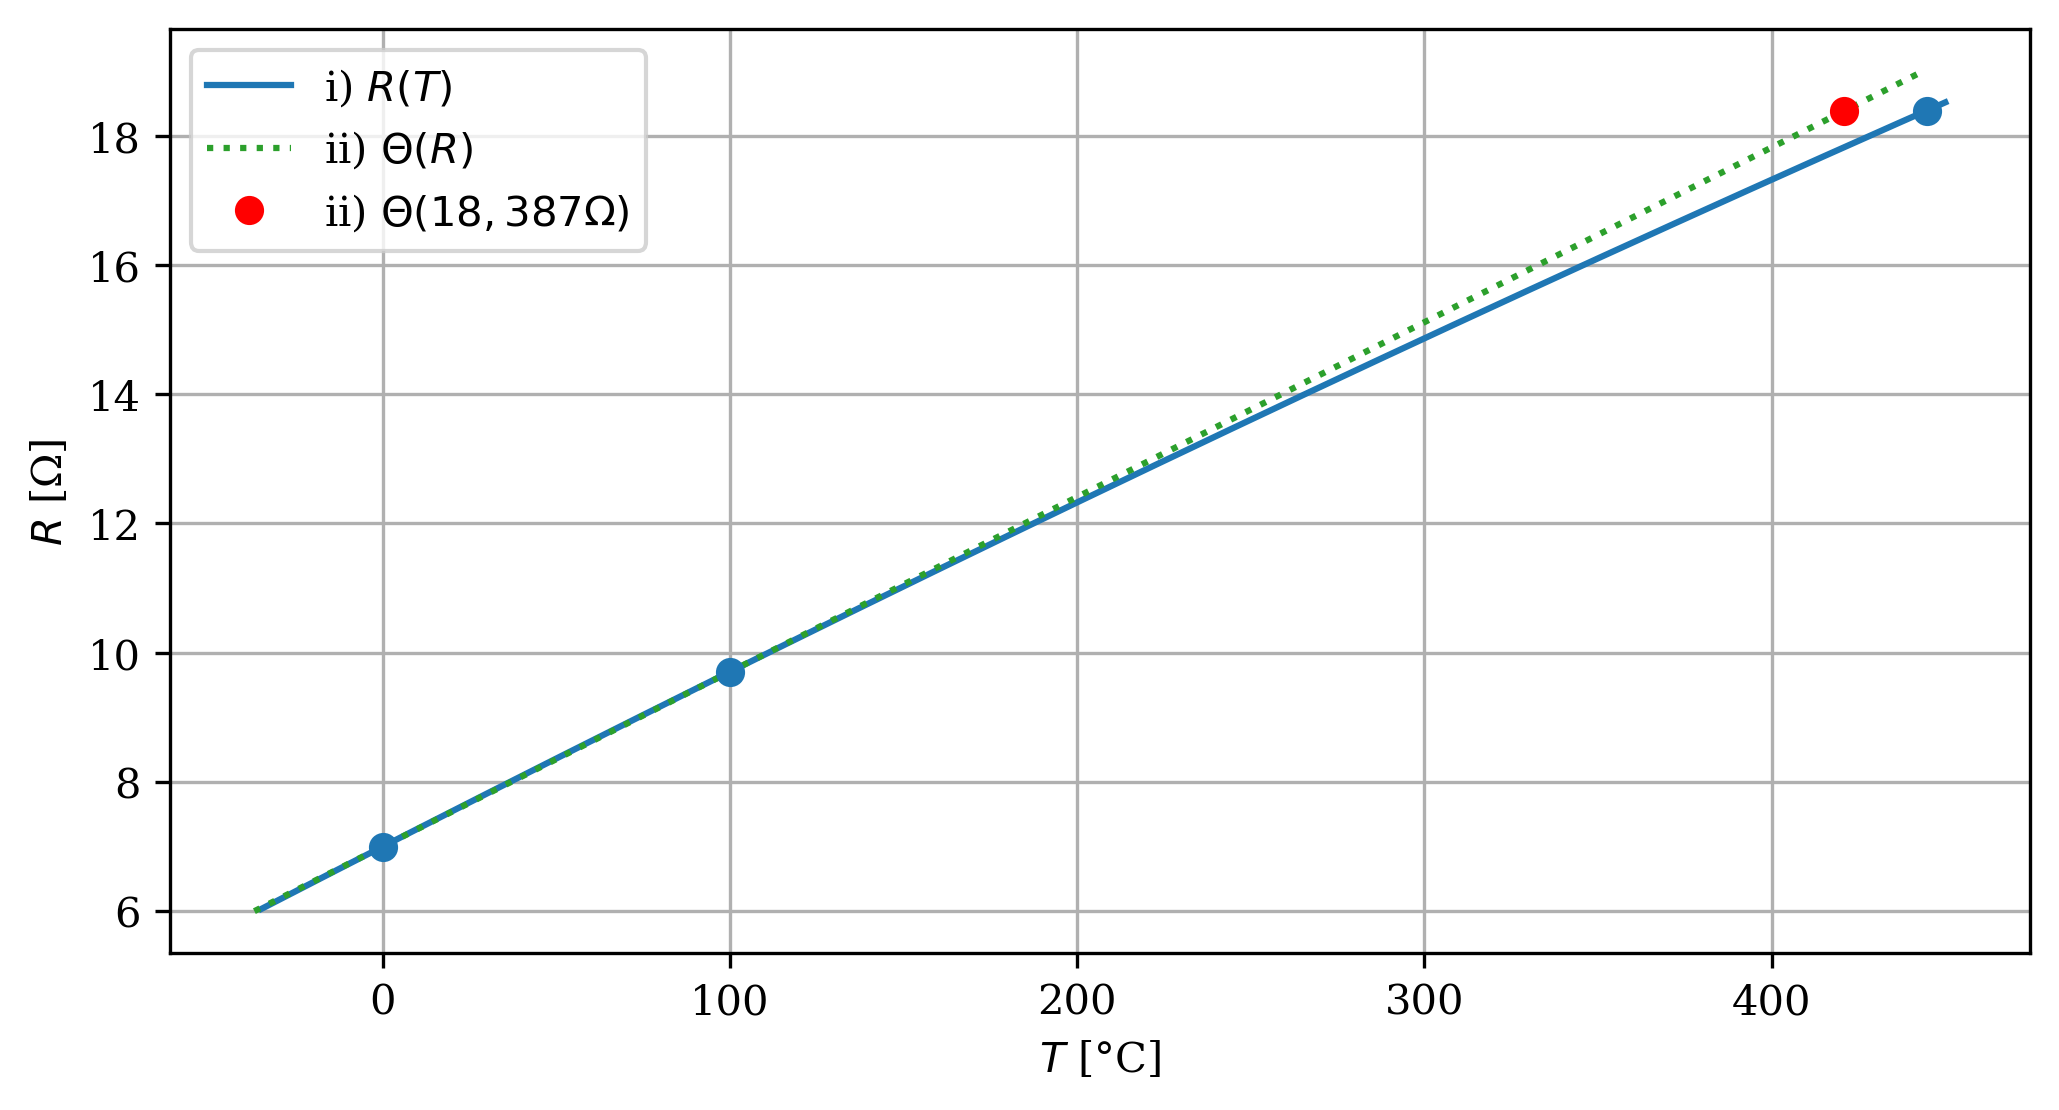

In [ ]:
#@title 1.b)
# i) Se despejan los parametros a, b y R0
R0, a, b, T = sym.symbols('R0, a, b, T', real=True)
R = R0*(1 + a*T + b*T**2)
eq_sys = [sym.Eq(R.subs(T, 0), 7), sym.Eq(R.subs(T, 100), 9.705),
          sym.Eq(R.subs(T, 444.6), 18.389)]
vals = sym.solve_poly_system(eq_sys, [R0, a, b])
R0, a, b = vals[0]
R1 = lambda T: R0*(1 + a*T + b*T**2)
print('i) Los parametros son:')
print(f' R0 = {R0:.3g} Ω')
print(f' a = {a:.3g} °C⁻¹')
print(f' b = {b:.3g} °C⁻2')
# ii) Se despejan los parametros de la escala lineal de temperauras
m, y0, R = sym.symbols('m, y0, R', real=True)
Theta = m*R + y0
eq_sys = [sym.Eq(Theta.subs(R, 7), 0), sym.Eq(Theta.subs(R, 9.705), 100),]
vals = sym.solve_poly_system(eq_sys, [m, y0])
m, y0 = vals[0]
Theta = lambda R: m*R + y0
print('\nii) Los parametros son:')
print(f' m = {m:.3g} Ω⁻¹')
print(f' y0 = {y0:.3g} °C')
print('y se estima:')
print(f' Θ(18,387 Ω) = {Theta(18.387):.3g} °C')
# Grafico
t = np.linspace(-35, 450, 5000)
r = np.linspace(6, 19, 5000)
plt.plot(t, R1(t), '-C0', label='i) $R(T)$')
plt.plot(Theta(r), r, ':C2', label='ii) $\Theta(R)$')
plt.plot([0, 100, 444.6], [7, 9.705, 18.387], 'o')
plt.plot([Theta(18.387)], [18.387], 'or', label='ii) $\Theta(18,387 Ω)$')
plt.grid()
plt.legend()
plt.xlabel(r'$T$ [°C]')
plt.ylabel('$R$ [Ω]')
plt.show()

### 1.c) Interpretación 1
$$\text{Sea } n(\Theta) \text{ la cantidad de divisiones del termómetro que se llenan de mercurio}$$

$$\text{ para una dada temperatura de magnitud } \Theta \text{ en grados Celsius, y } f(n) \text{ es una corrección a la medición del termometro tal que:}$$

$$f(n) + n(\Theta) = \Theta \quad \Rightarrow \quad f(n) = \Theta - n(\Theta) \quad \Rightarrow \quad f(n) = \Theta(n) - n$$

$$\text{Usando que } \Theta(n) = \frac{n + 2}{1.05} \text{, se tiene } f(n) = \frac{n + 2}{1.05} - n.$$

$$\text{Luego, no hay que aplicar corrección donde:}$$

$$f(n) = 0 \quad \iff \quad 0 = \frac{n + 2}{1.05} - n \quad \iff \quad n\cdot 1.05 = n + 2$$

$$\iff \quad (1.05 - 1)\cdot n = 2 \quad \iff \quad 0.05\cdot n = 2  \quad \iff \quad n = 40$$

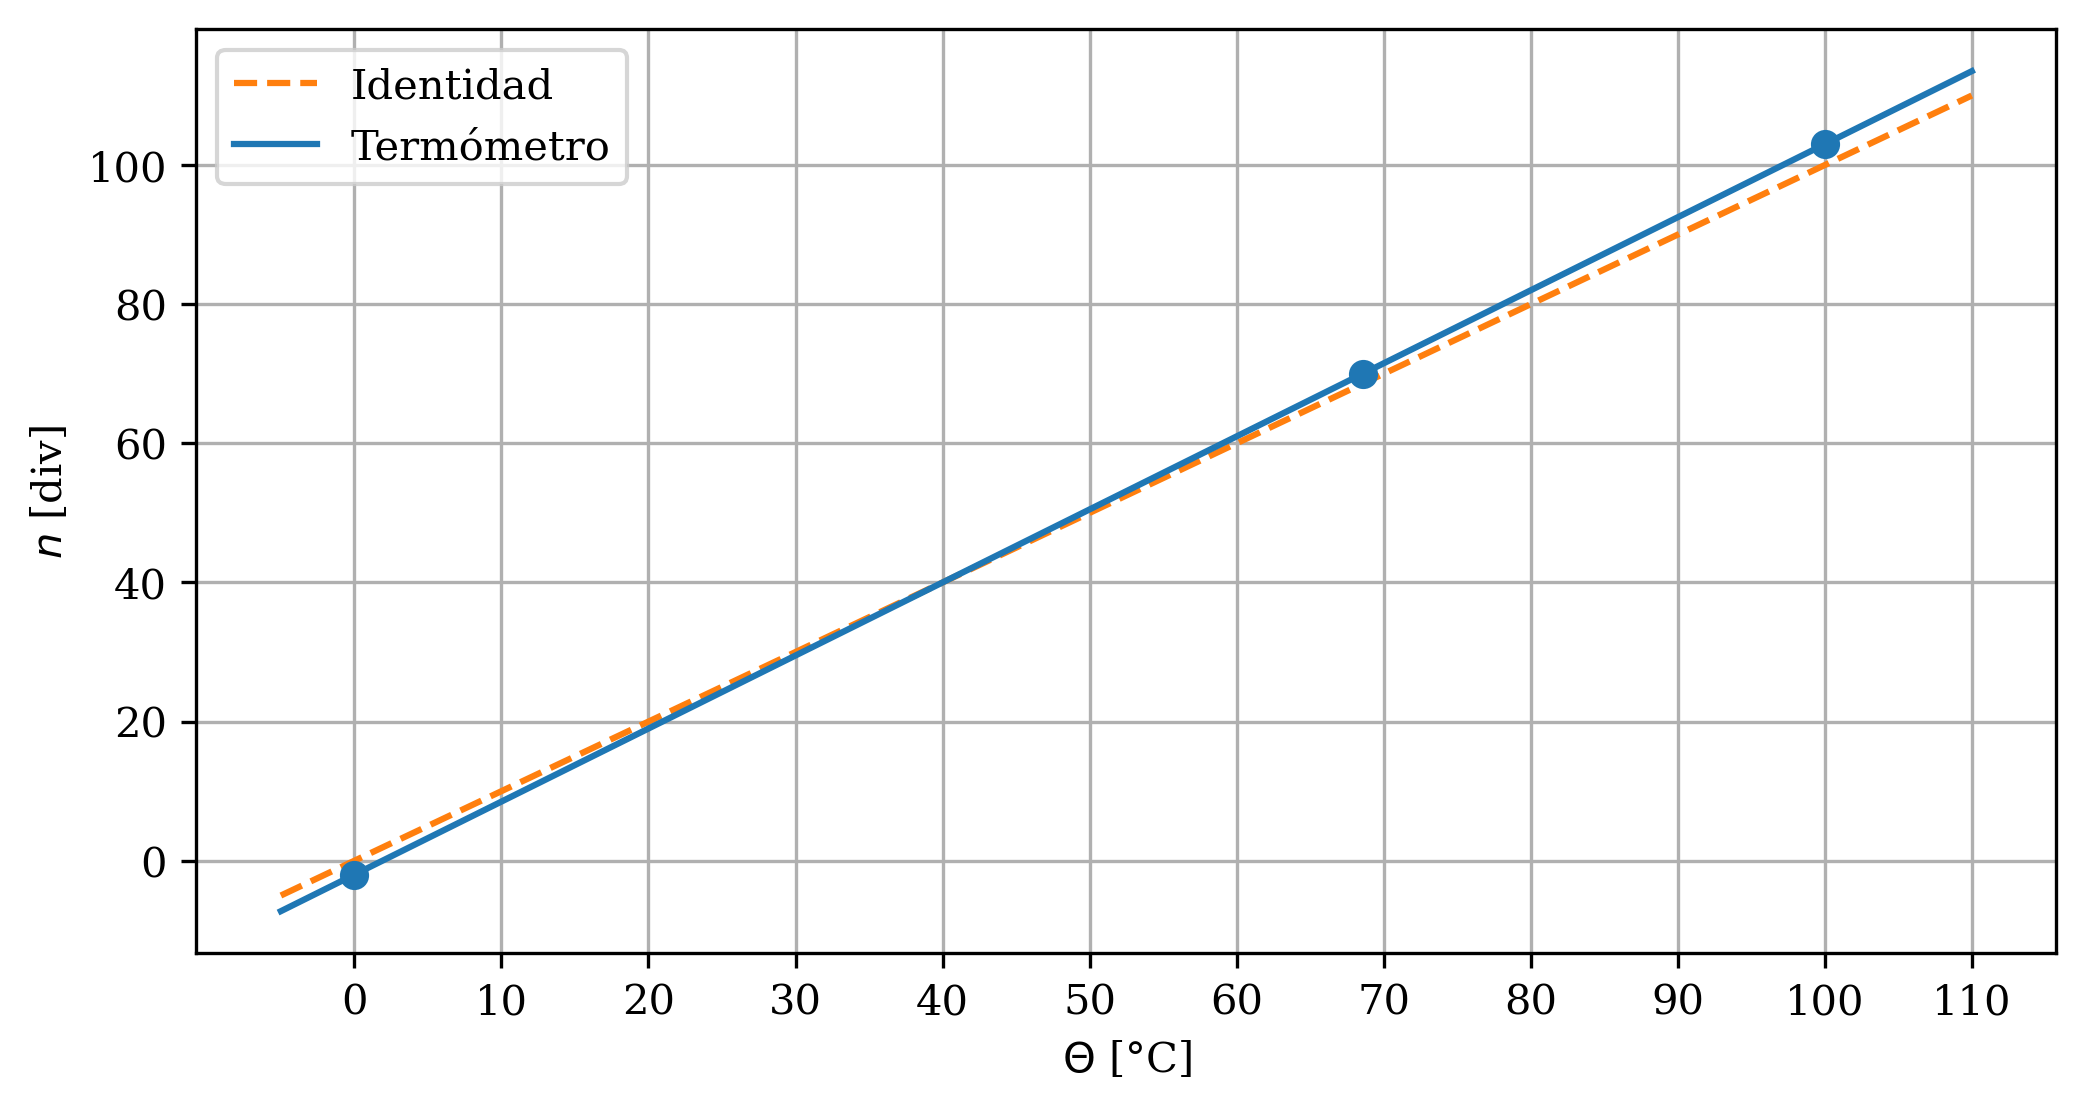

In [ ]:
#@title
a = 1.05
b = -2
n = lambda Theta: a*Theta + b
Theta = lambda n: (n - b)/a
t = np.linspace(-5, 110, 1000)
plt.plot(t, t, '--C1', label='Identidad')
plt.plot(t, n(t), '-C0', label='Termómetro')
plt.plot([0, Theta(70), 100], [n(0), 70, n(100)], 'o')
plt.grid()
plt.legend()
plt.xlabel(r'$\Theta$ [°C]')
plt.xticks(np.arange(0, 120, 10))
plt.ylabel('$n$ [div]')
plt.show()

### 1.c) Interpretación 2
#### **Mismos resultados, ojo con las variables! $n(T), \Theta(n), f(n)$**
$$\text{Sea } n(T) \text{ la cantidad de divisiones del termómetro que se llenan de mercurio}$$

$$\text{ para una dada temperatura de magnitud } T \text{ en grados Celsius,}$$ 

$$\text{y sea } \Theta(n) \text{ la medición calibrada linealmente de temperatura que se obtiene de ese termómetro.}$$
$$\text{Entonces definimos } f(n) \text{, una corrección a las numeraciones de las divisiones del termometro tal que:}$$

$$f(n) + n(T) = \Theta \quad \Rightarrow \quad f(n) = \Theta - n(T) \quad \Rightarrow \quad f(n) = \Theta(n) - n$$

$$\text{Usando que } \Theta(n) = \frac{20 \cdot n + 40}{21} \text{, se tiene } f(n) = \frac{20 \cdot n + 40}{21} - n.$$

$$\text{Luego, no hay que aplicar corrección donde:}$$

$$f(n) = 0 \quad \iff \quad 0 = \frac{20 \cdot n + 40}{21} - n \quad \iff \quad 0 = 20\cdot n + 40 - 21 \cdot n$$

$$\iff \quad n = 40$$

Se tiene Θ(n) = a0·n + y0, con:
 a0 = 20/21 °C ~ 0.952 °C
 y0 = 40/21 °C ~ 1.9 °C
y se estima:
 Θ(70) = 480/7 °C ~ 68.6 °C


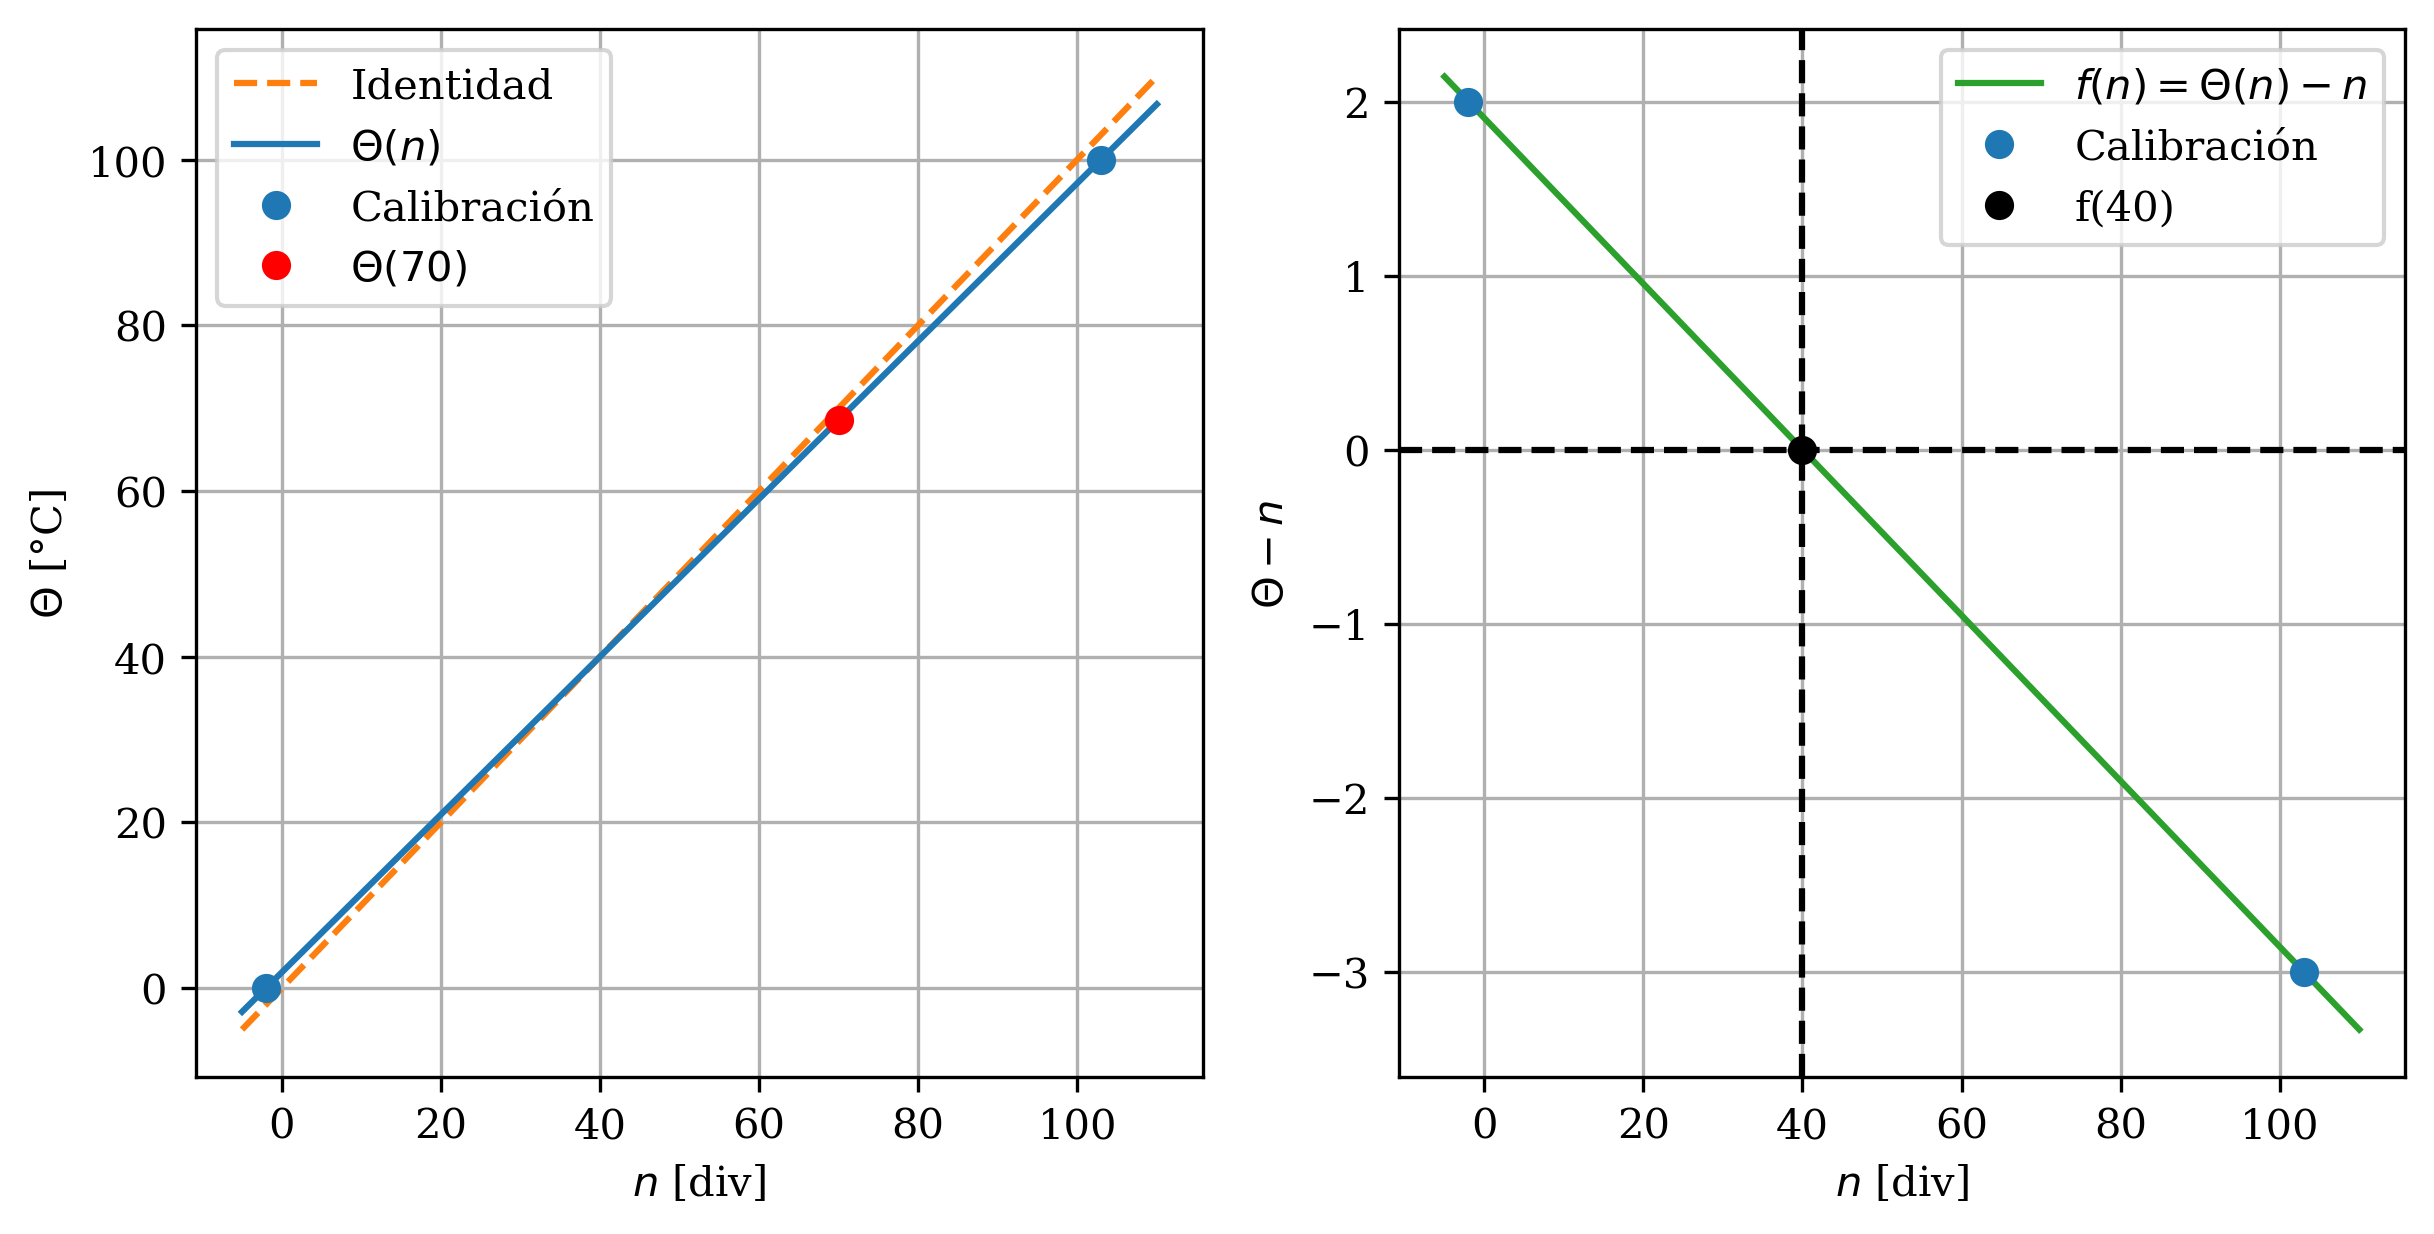

In [ ]:
#@title
# Se calibra linealmente el termometro
a0, y0, n = sym.symbols('a0, y0, n', real=True)
Theta = a0*n + y0
eq_sys = [sym.Eq(Theta.subs(n, -2), 0), sym.Eq(Theta.subs(n, 103), 100),]
vals = sym.solve_poly_system(eq_sys, [a0, y0])
a0, y0 = vals[0]
Theta = lambda n: a0*n + y0
print('Se tiene Θ(n) = a0·n + y0, con:')
print(f' a0 = {a0} °C ~ {float(a0):.3g} °C')
print(f' y0 = {y0} °C ~ {float(y0):.3g} °C')
print('y se estima:')
print(f' Θ(70) = {Theta(70)} °C ~ {float(Theta(70)):.3g} °C')
a0, y0 = [float(val) for val in vals[0]]
Theta = lambda n: a0*n + y0
# Grafico
n = np.linspace(-5, 110, 1000)
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].plot(n, n, '--C1', label='Identidad')
axs[0].plot(n, Theta(n), '-C0', label=r'$\Theta(n)$')
axs[0].plot([-2, 103], [0, 100], 'o', label='Calibración')
axs[0].plot([70,], [Theta(70)], 'or', label=r'$\Theta(70)$')
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel(r'$\Theta$ [°C]')
axs[0].set_xticks(np.arange(0, 120, 20))
axs[0].set_xlabel('$n$ [div]')

axs[1].plot(n, Theta(n) - n, '-C2', label=r'$f(n) = \Theta(n) - n$')
axs[1].plot([-2, 103], [0 + 2, 100 - 103], 'o', label='Calibración')
axs[1].axhline(0, ls='--', c='k')
axs[1].axvline(40, ls='--', c='k')
axs[1].plot([40, ], [0, ], 'ok', label='f(40)')
axs[1].grid()
axs[1].legend()
axs[1].set_ylabel(r'$\Theta - n$')
axs[1].set_xticks(np.arange(0, 120, 20))
axs[1].set_xlabel('$n$ [div]')
plt.show()

### 1.d)
![Gráfico 1.d](https://github.com/agustinbrusco/Fisica-4/blob/main/Figs/Gu%C3%ADa%2002%20Gr%C3%A1fico%201d.png?raw=true)


i) Los parametros son para el termometro I a 300 dinas son:
 m = 5/12 °C/cm
 b = -50/3 °C
tal que Θ(l) = 5/12°C/cm·l -50/3°C
y se estima:
 I_300(100 cm) = 25 °C ~ T3

iii) A 300 dinas, y con una longitud de 160 cm, el termometro I mide:
 I_300(160 cm) = 50 °C

i) Los parametros son para el termometro II a 300 dinas son:
 m = 25/36 °C/cm
 b = -625/18 °C
tal que Θ(l) = 25/36°C/cm·l -625/18°C
y se estima:
 II_300(70 cm) = 13.9 °C ~ T3

ii) Los parametros son para el termometro I a 400 dinas son:
 m = 2/5 °C/cm
 b = -20 °C
tal que Θ(l) = 2/5°C/cm·l -20°C
y se estima:
 I_400(119 cm) = 27.6 °C ~ T3

ii) Los parametros son para el termometro II a 400 dinas son:
 m = 25/37 °C/cm
 b = -1550/37 °C
tal que Θ(l) = 25/37°C/cm·l -1550/37°C
y se estima:
 II_400(87 cm) = 16.9 °C ~ T3


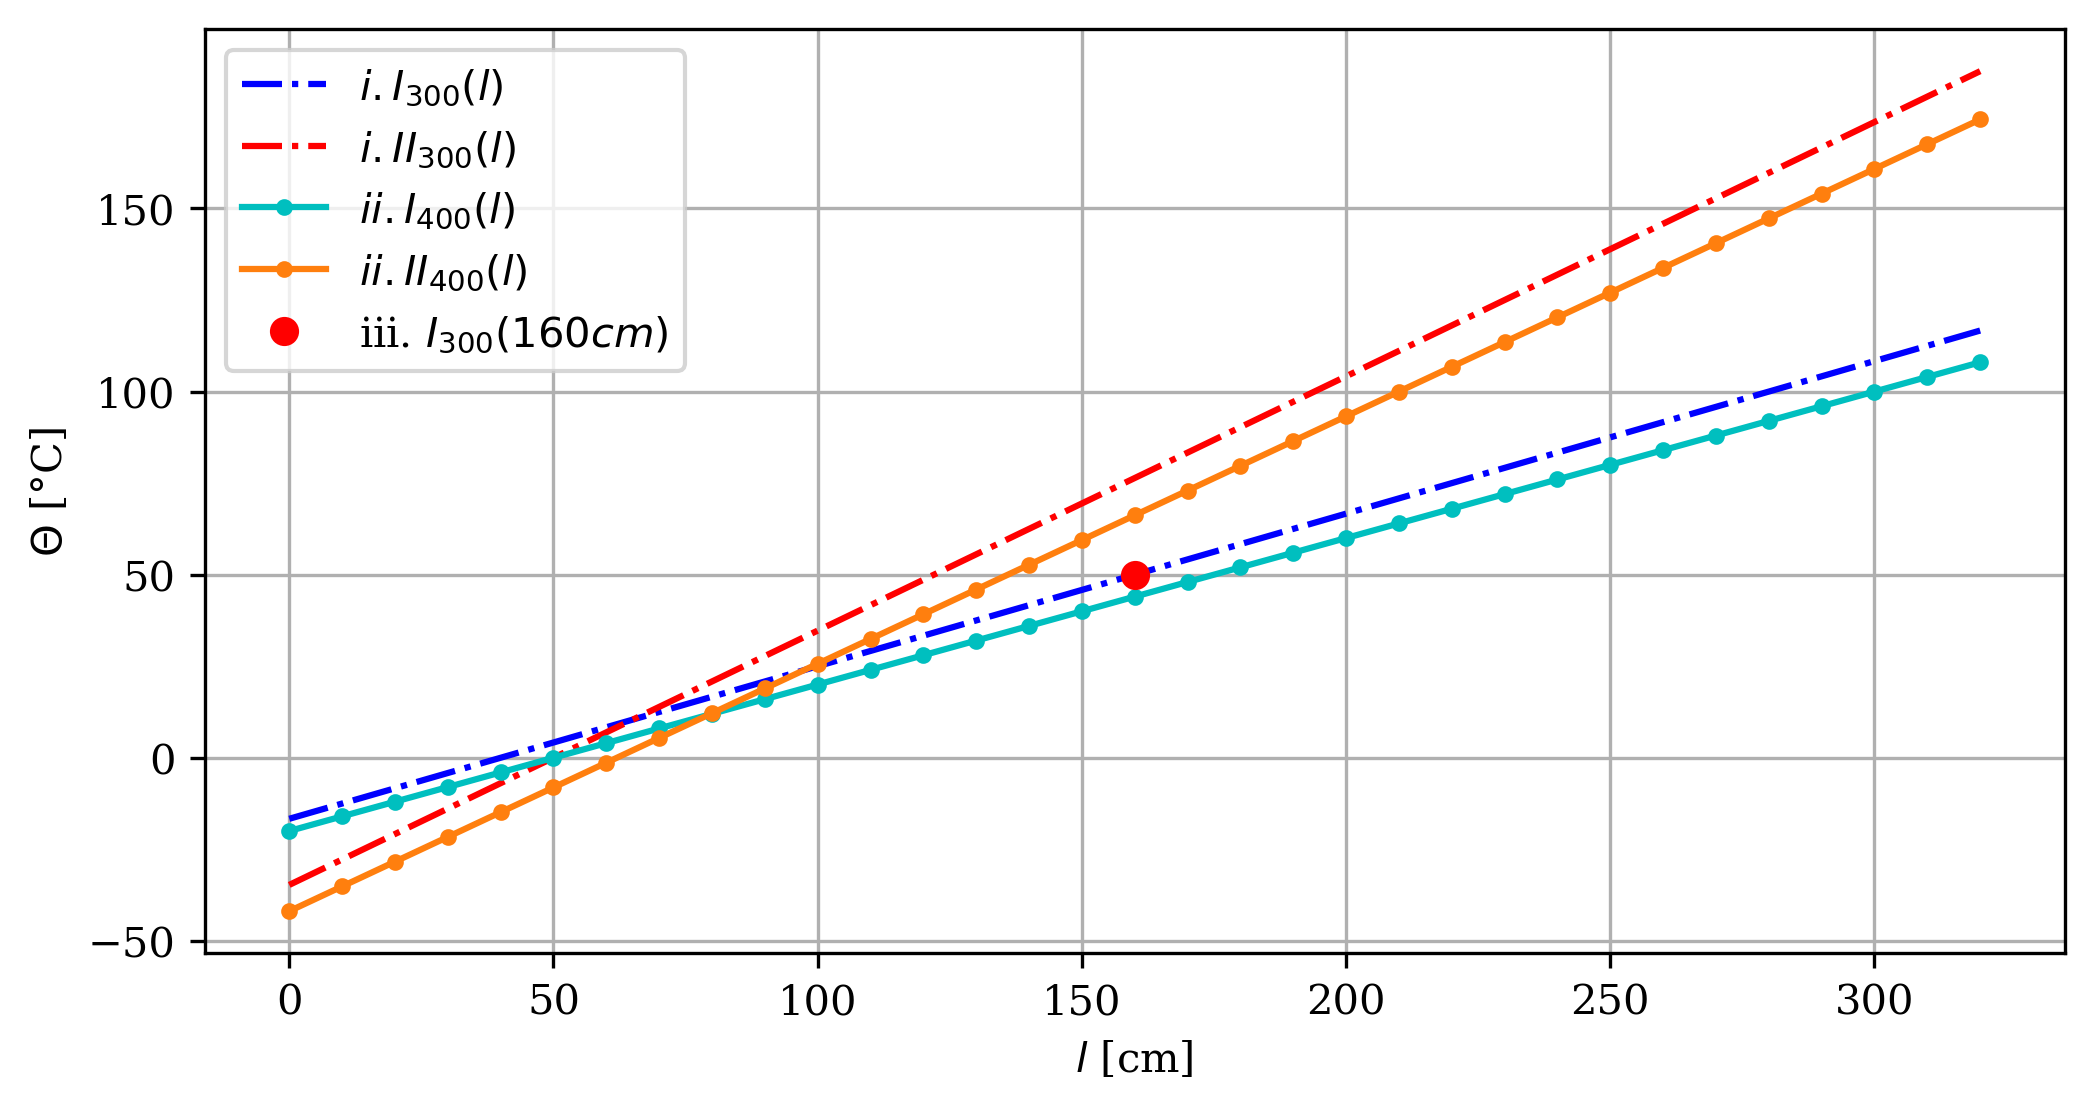

In [ ]:
#@title
l_num = np.arange(0, 330, 10)  # predefino el dominio numerico
# Se despejan los parametros de la escala lineal de temperauras para I e II
# Termometro I, 300 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 40), 0), sym.Eq(Theta.subs(l, 280), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta1 = float(m)*l_num + float(b)
print('\ni) Los parametros son para el termometro I a 300 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm·l {b}°C')
print('y se estima:')
print(f' I_300(100 cm) = {m*100 + b} °C ~ T3')
# iii) Termometro I a 300 dinas y 160 cm
I_300_160 = m*160 + b
print('\niii) A 300 dinas, y con una longitud de 160 cm, el termometro I mide:' +
      f'\n I_300(160 cm) = {float(I_300_160):.3g} °C')

# Termometro II, 300 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 50), 0), sym.Eq(Theta.subs(l, 194), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta2 = float(m)*l_num + float(b)
print('\ni) Los parametros son para el termometro II a 300 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm·l {b}°C')
print('y se estima:')
print(f' II_300(70 cm) = {float(m*70 + b):.3g} °C ~ T3')

# Termometro I, 400 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 50), 0), sym.Eq(Theta.subs(l, 300), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta3 = float(m)*l_num + float(b)
print('\nii) Los parametros son para el termometro I a 400 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm·l {b}°C')
print('y se estima:')
print(f' I_400(119 cm) = {float(m*119 + b):.3g} °C ~ T3')

# Termometro II, 400 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 62), 0), sym.Eq(Theta.subs(l, 210), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta4 = float(m)*l_num + float(b)
print('\nii) Los parametros son para el termometro II a 400 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm·l {b}°C')
print('y se estima:')
print(f' II_400(87 cm) = {float(m*87 + b):.3g} °C ~ T3')

# Grafico los termometros calibrados linealmente a distintas tensiones
plt.plot(l_num, Theta1, '-.b', label='$i. I_{300}(l)$')
plt.plot(l_num, Theta2, '-.r', label='$i. II_{300}(l)$')
plt.plot(l_num, Theta3, '.-c', label='$ii. I_{400}(l)$')
plt.plot(l_num, Theta4, '.-C1', label='$ii. II_{400}(l)$')
plt.plot([160], [float(I_300_160)], 'or', label='iii. $I_{300}(160 cm)$')
plt.grid()
plt.legend()
plt.xlabel(r'$l$ [cm]')
plt.ylabel('$\Theta$ [°C]')
plt.show()

###1.e)
**Interpretación:** Son diferentes gases ideales (por lo tanto distintas densidades $\Rightarrow$ distintos $v$ aunque $V$ se mantenga constante) cuya presión se midió a $T_\text{hielo}$ = 0 °C y luego a temperaturas $T$.

$$p = \frac{R \cdot T}{v}, \text{ en particular:} \quad p_i = \frac{R \cdot 273,15 \text{K}}{v} \Rightarrow v = \frac{R \cdot 273,15 \text{K}}{p_i}$$

$$\Rightarrow \quad p = \frac{R \cdot T \cdot p_i}{R \cdot 273,15 \text{K}}$$


In [ ]:
#@title 
p_i = np.array([100, 200, 300, 400])*cte.atm/cte.mmHg  # atm
p = np.array([127.9, 256.5, 385.8, 516.0])*cte.atm/cte.mmHg  # atm
T_hielo = cte.convert_temperature(0, 'Celsius', 'Kelvin')  # K
v = cte.R*T_hielo/p_i  # m³/mol
T = p*v/cte.R  # K
for i, t in enumerate(T):
    print(f'p = {p[i]*cte.mmHg/cte.atm} mmHg --> T = {t:.3g} K')

p = 127.9 mmHg --> T = 349 K
p = 256.5 mmHg --> T = 350 K
p = 385.8 mmHg --> T = 351 K
p = 516.0 mmHg --> T = 352 K


###1.f)

Los valores de calibración son:
 R(0 °C) = 2 Ω
 R(100 °C) = 2.8 Ω

Se tiene Θ(R) = m·R + b, con:
 m = 125 °C/Ω
 b = -250 °C

La diferencia entre medición y temperatura es máxima en:
 T = 50.0 °C
 R(T) = 2.40 Ω
y vale:
 Θ(2.40 Ω) = 50.4 °C
es decir:
 Θ(2.40 Ω) - 50.0 °C = 0.375


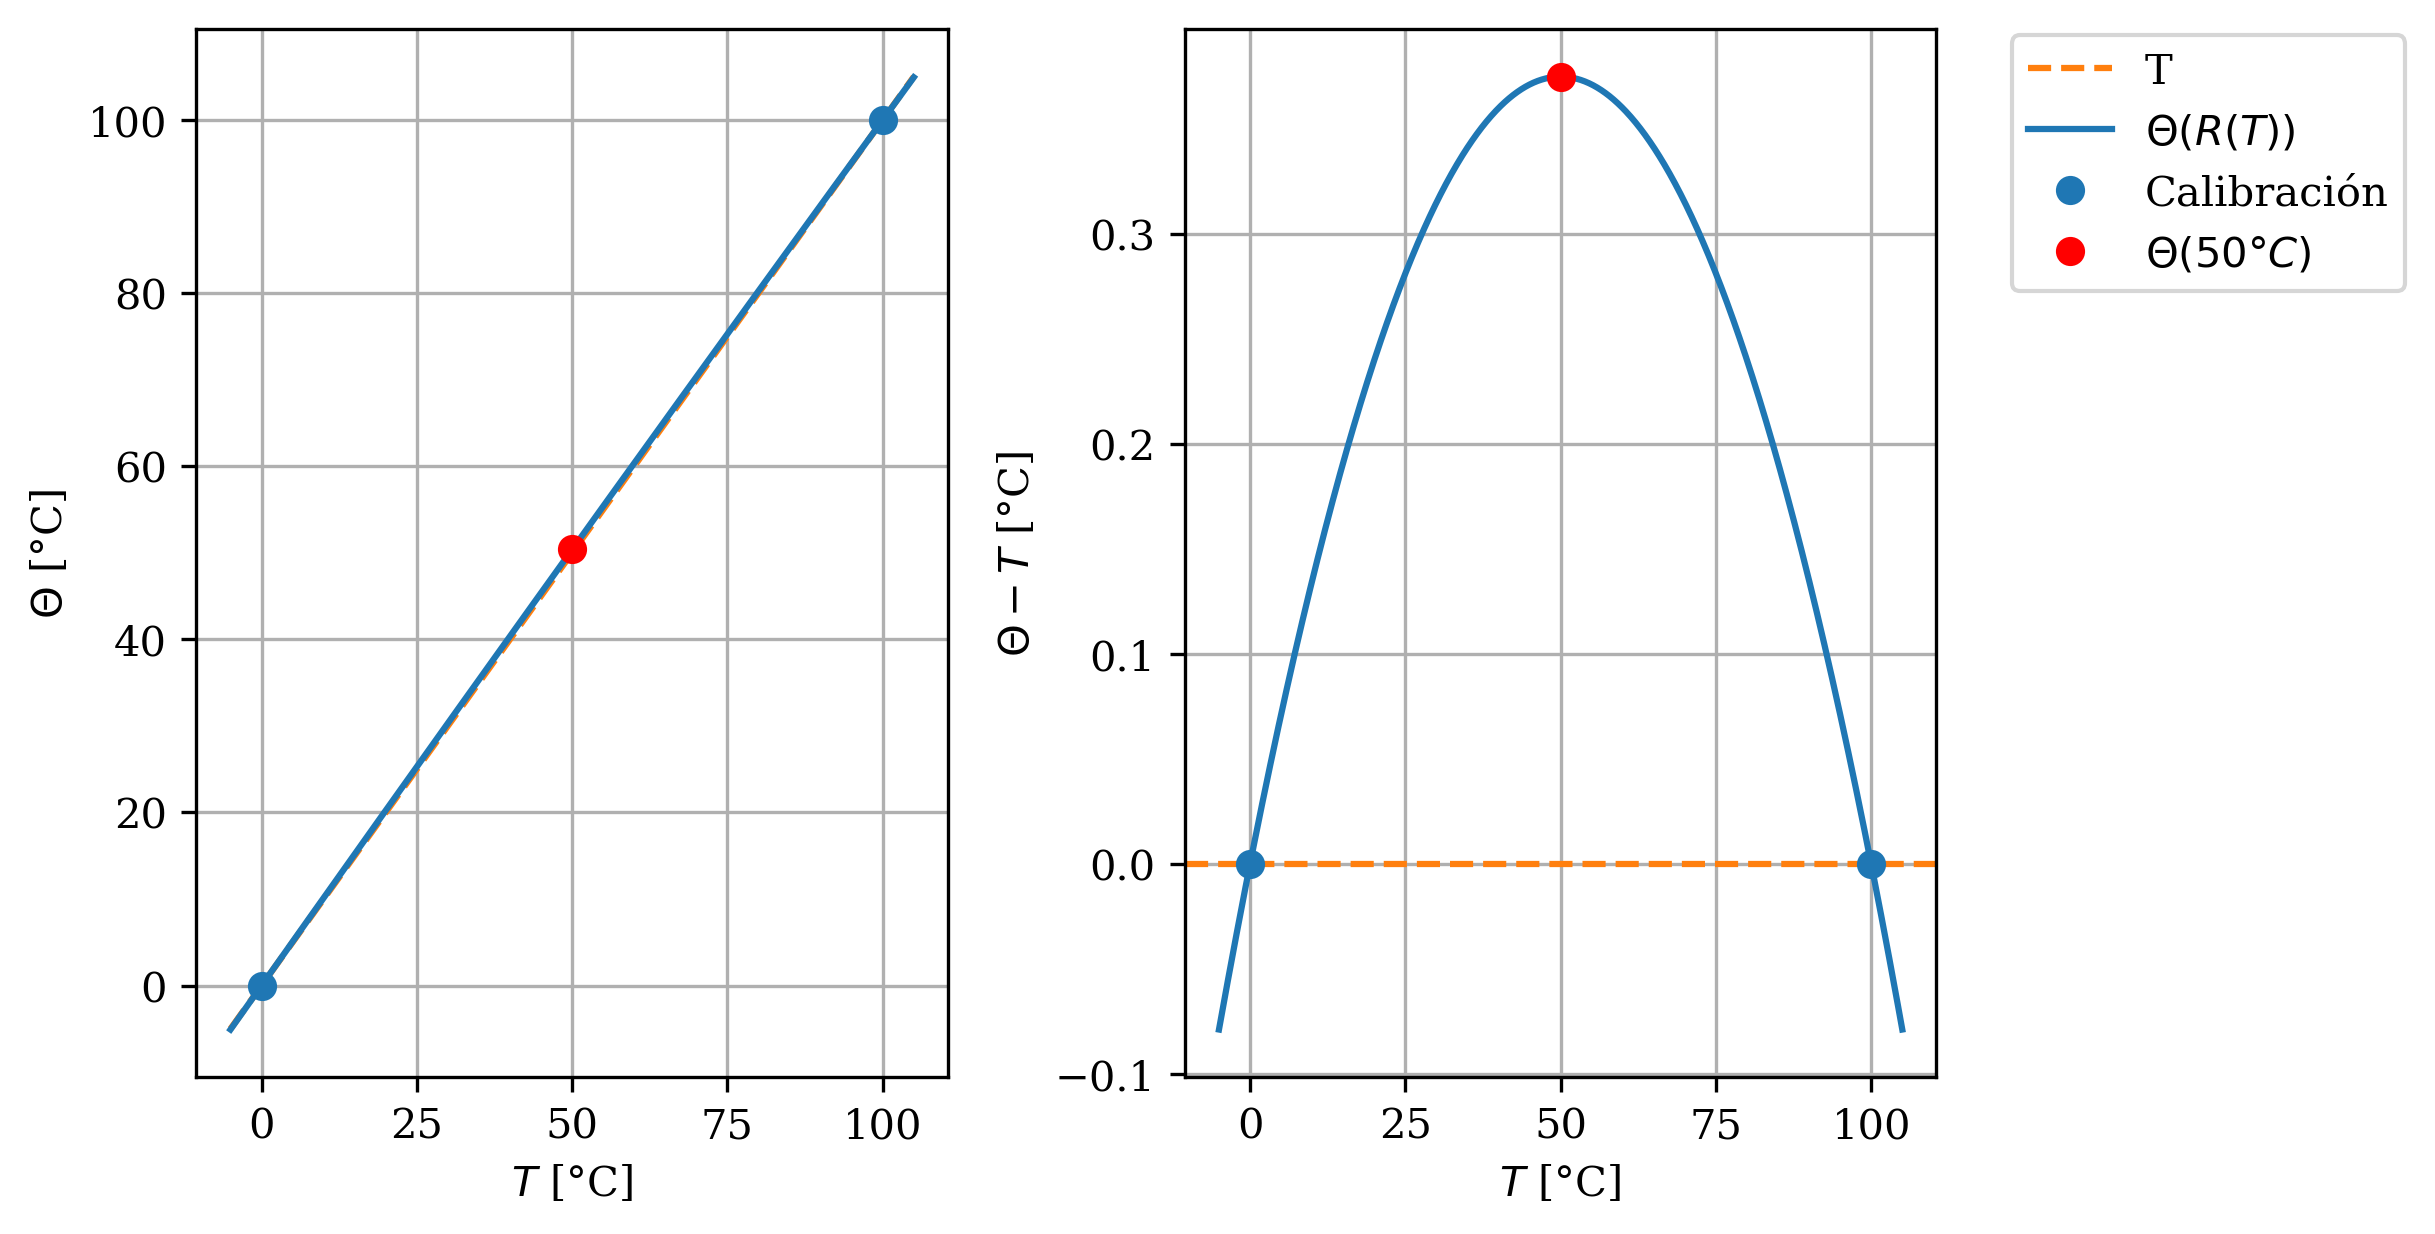

In [ ]:
#@title
# Datos:
a0 = 2  # Ω
a1 = 8.12e-3  # Ω/°C
a2 = -1.2e-6  # Ω/°C²
R = lambda T: a0 + a1*T + a2*T**2
print('Los valores de calibración son:')
print(f' R(0 °C) = {R(0):.3g} Ω')
print(f' R(100 °C) = {R(100):.3g} Ω')
# Se calibra linealmente el termometro
m, b = sym.symbols('m, b', real=True)
eq_sys = [sym.Eq(m*R(0) + b, 0), sym.Eq(m*R(100) + b, 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta = lambda R: m*R + b
print('\nSe tiene Θ(R) = m·R + b, con:')
print(f' m = {float(m):.3g} °C/Ω')
print(f' b = {float(b):.3g} °C')
# Derivando y despejando en la hoja obtengo:
T_max = (1-m*a1)/(2*m*a2)
print('\nLa diferencia entre medición y temperatura es máxima en:')
print(f' T = {T_max:.3g} °C')
print(f' R(T) = {R(T_max):.3g} Ω')
print(f'y vale:\n Θ({R(T_max):.3g} Ω) = {Theta(R(T_max)):.3g} °C')
print(f'es decir:\n Θ({R(T_max):.3g} Ω) - {T_max:.3g} °C = {Theta(R(T_max)) - T_max:.3g}')
# Grafico
t = np.linspace(-5, 105, 1000)
fig, axs = plt.subplots(1, 2, constrained_layout=True)

axs[0].plot(t, t, '--C1', label='T')
axs[0].plot(t, Theta(R(t)), '-C0', label=r'$\Theta(R(T))$')
axs[0].plot([0, 100], [0, 100], 'o', label='Calibración')
axs[0].plot([T_max,], [Theta(R(T_max))], 'or', label=r'$\Theta(50 °C)$')
axs[0].grid()
axs[0].set_ylabel(r'$\Theta$ [°C]')
axs[0].set_xlabel('$T$ [°C]')

axs[1].axhline(ls='--', c='C1', label='T')
axs[1].plot(t, Theta(R(t)) - t, '-C0', label=r'$\Theta(R(T))$')
axs[1].plot([0, 100], [0, 0], 'o', label='Calibración')
axs[1].plot([T_max,], [Theta(R(T_max)) - T_max], 'or', label=r'$\Theta(50 °C)$')
axs[1].grid()
axs[1].legend(loc=(1.1, 0.75))
axs[1].set_ylabel(r'$\Theta - T$ [°C]')
axs[1].set_xlabel('$T$ [°C]')

plt.show()

### 2.a)

In [ ]:
#@title
m_cal = 20  # g
c_cal = 0.215  # cal/(g·K)
m_h20 = 100  # g
c_h20 = 4182*1e-3/cte.calorie  # cal/(g·K)
m_pb = 600  # g
T_i = cte.convert_temperature(80, 'Celsius', 'Kelvin')  # K
T_pb = cte.convert_temperature(25, 'Celsius', 'Kelvin')  # K
T_f = cte.convert_temperature(72, 'Celsius', 'Kelvin')  # K
c_pb = -(m_h20*c_h20 + m_cal*c_cal)*(T_f - T_i)/(m_pb*(T_f - T_pb))  # cal/(g·K)
print(f'c_Pb = {c_pb:.3g} cal/(g·K) = {c_pb*1e3*cte.calorie:.3g} J/(kg·K)')

c_Pb = 0.0296 cal/(g·K) = 124 J/(kg·K)


### 2.b)

In [ ]:
#@title
m_cal = 300  # g
m_h20 = 500  # g
c_h20 = 4182*1e-3/cte.calorie  # cal/(g·K)
m_cu = 530  # g
T_i = cte.convert_temperature(15, 'Celsius', 'Kelvin')  # K
T_cu = cte.convert_temperature(115, 'Celsius', 'Kelvin')  # K
T_f = cte.convert_temperature(25, 'Celsius', 'Kelvin')  # K
print(f'T_i = {T_i} K, T_cu = {T_cu} K, T_f = {T_f}')
c_cu = -(m_h20*c_h20*(T_f - T_i))/(m_cu*(T_f - T_cu) + m_cal*(T_f - T_i))
print(f'c_Cu = {c_cu:.3g} cal/(g·K) = {c_cu*1e3*cte.calorie:.3g} J/(kg·K) = {c_cu/c_h20:.3g}·c_H20')
print(f'm_eq = {m_cal*c_cu/c_h20:.3g} g')

T_i = 288.15 K, T_cu = 388.15 K, T_f = 298.15
c_Cu = 0.112 cal/(g·K) = 468 J/(kg·K) = 0.112·c_H20
m_eq = 33.6 g


### 2.c)

In [ ]:
#@title
rho_h2o = 1  # g/cm³
V_h2o = 1  # cm³
c_h2o = 1  # cal/(g·K)
rho_aire = 0.00129  # g/cm³
c_aire = 0.25  # cal/(g·K)
V_aire = V_h2o*rho_h2o*c_h2o/(rho_aire*c_aire)  # cm³
print(f'El volumen de aire equivalente a un cm³ de agua es {V_aire:.3g} cm³')

El volumen de aire equivalente a un cm³ de agua es 3.1e+03 cm³


## Guía 3a: Trabajo y Calor

In [ ]:
#@title Superficie de Estado de un Gas Ideal
#@markdown Ejecutar, la interfaz aparece luego.

# Este código es diferente de todo el anterior. Utiliza la librería plotly-dash

def Campo_Escalar_R2(f, dom_x=[-5., 5.], dom_y=[-5., 5.],
                     res=20, colors='plasma'):
    '''Grafica las curvas de nivel de f(x,y) en R² usando la función Surface
    de Plotly

    Parametros
    ----------
        f : str
                Expresión en función de dos parametros reales x e y.
                Ej : f='(x-1)/(y+1)'

        dom_x, dom_y : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5]

        res : int, default : 20
                Raíz cuadrada de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x" y de "y" y se
                completará una grilla de "x" contra "y" (res×res elementos)
                como dominio.

        colors : str, default : "plasma"
                String con el nombre de un mapa de color de la librería que
                corresponda a la representación elegida.
                Para ver todas las opciones visitar:
                https://matplotlib.org/stable/tutorials/colors/colormaps.html
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        fig : 

    '''
    T, V = sym.symbols('T V', real=True, nonnegative=True)  # Definición de variables simbolicas
    R = sym.symbols('R', real=True)
    f_sym = sym.sympify(f, evaluate=False).subs({'T': T, 'V': V, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi,
                                                 'R': R})
    # Obtengo una versión numérica de la función T_sym para evaluarla luego.
    f_num = sym.lambdify([V, T, R], f_sym, ['numpy',
                                            {'sen': np.sin, 'Sign': np.sign}])
    # Preparo las variables del dominio
    x = np.linspace(dom_x[0], dom_x[1], res)
    y = np.linspace(dom_y[0], dom_y[1], res)
    X, Y = np.meshgrid(x, y)
    # Calculo las variables de la imagen
    Z = f_num(X, Y, cte.R)
    ltx_expr = sym.latex(f_sym)
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z,
                                     colorscale=colors,
                                     surfacecolor=np.sqrt(X**2 + Y**2 + Z**2),
                                     showscale=False)])
    # fig.update_traces(contours_z=dict(show=True, color='green',
    #                                   highlightcolor="green", width=1,
    #                                   project_z=True),
    #                   contours_x=dict(show=True, color='blue',
    #                                   highlightcolor="blue", width=1,
    #                                   project_x=True),
    #                   contours_y=dict(show=True, color='red',
    #                                   highlightcolor="red", width=1,
    #                                   project_y=True))
    fig.update_layout(title={'text': r'$p(T,V) = '+ltx_expr+'$',
                             'y':0.95, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',},
                      autosize=False, margin=dict(l=0, r=50, b=0, t=60),
                      scene={'xaxis_title': 'V (m³)',
                             'yaxis_title': 'T (K)',
                             'zaxis_title': 'p (Pa)',
                             'camera_eye': dict(x=1.25, y=-1.25, z=1.25)},
                      width=700, height=700,)
    return fig



app = JupyterDash(__name__,
                  external_scripts=["https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-MML-AM_CHTML" ])

app.layout = html.Div([

    html.H1("PV=nRT", style={'text-align': 'center'}),
    
    html.Div(id='rango_T', children=[], style={'backgroundColor':'white'}),
    dcc.RangeSlider(id='dom_y', min=1e-5, max=400, value=[273, 373], step=1,
                    allowCross=True, pushable=2,
                    marks=dict([(x, str(x)) for x in range(0, 500+1, 50)] +
                               [(273, '0 °C'), (373, '100 °C')])),
    
    html.Div(id='rango_V', children=[], style={'backgroundColor':'white'}),
    dcc.RangeSlider(id='dom_x', min=0, max=30, value=[5, 10], step=0.5,
                    allowCross=True, pushable=2,
                    marks=dict([(x, str(x)) for x in range(0, 30+1, 5)])),
    
    dcc.Markdown("Colores:"),
    dcc.Dropdown(id="cmaps", #La id es con lo que despues vamos a buscar a este Dropdown. Es una forma CSS-esca de guardar "objetos"
                 value="magma", #El valor que representa por defecto
                 options=[{'value': x, 'label': x} for x in px.colors.named_colorscales()],
                 style={'width': "40%"}),
    
    html.Br(),

    dcc.Graph(id='surface', figure={}, style=dict(height=1000, width=1000))

])


# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='rango_T', component_property='children'),
     Output(component_id='rango_V', component_property='children'),
     Output(component_id='surface', component_property='figure'),],
    [Input(component_id='dom_x', component_property='value'),
     Input(component_id='dom_y', component_property='value'),
     Input(component_id='cmaps', component_property='value'),]
)
def update_graph(dom_x, dom_y, cmap):
    expr = "R*T/V"
    dominio_T = f"Dominio T : ({dom_y[0]} , {dom_y[-1]}) K"
    dominio_V = f"Dominio V : ({dom_x[0]} , {dom_x[-1]}) m³"
    fig = Campo_Escalar_R2(expr, dom_x=dom_x, dom_y=dom_y, res=150, colors=cmap)
    fig.update_layout(scene=dict(xaxis=dict(range=dom_x,),
                                 yaxis=dict(range=dom_y,)),)

    return dominio_T, dominio_V, fig, 


# ------------------------------------------------------------------------------

app.run_server(mode='inline', port=8030)

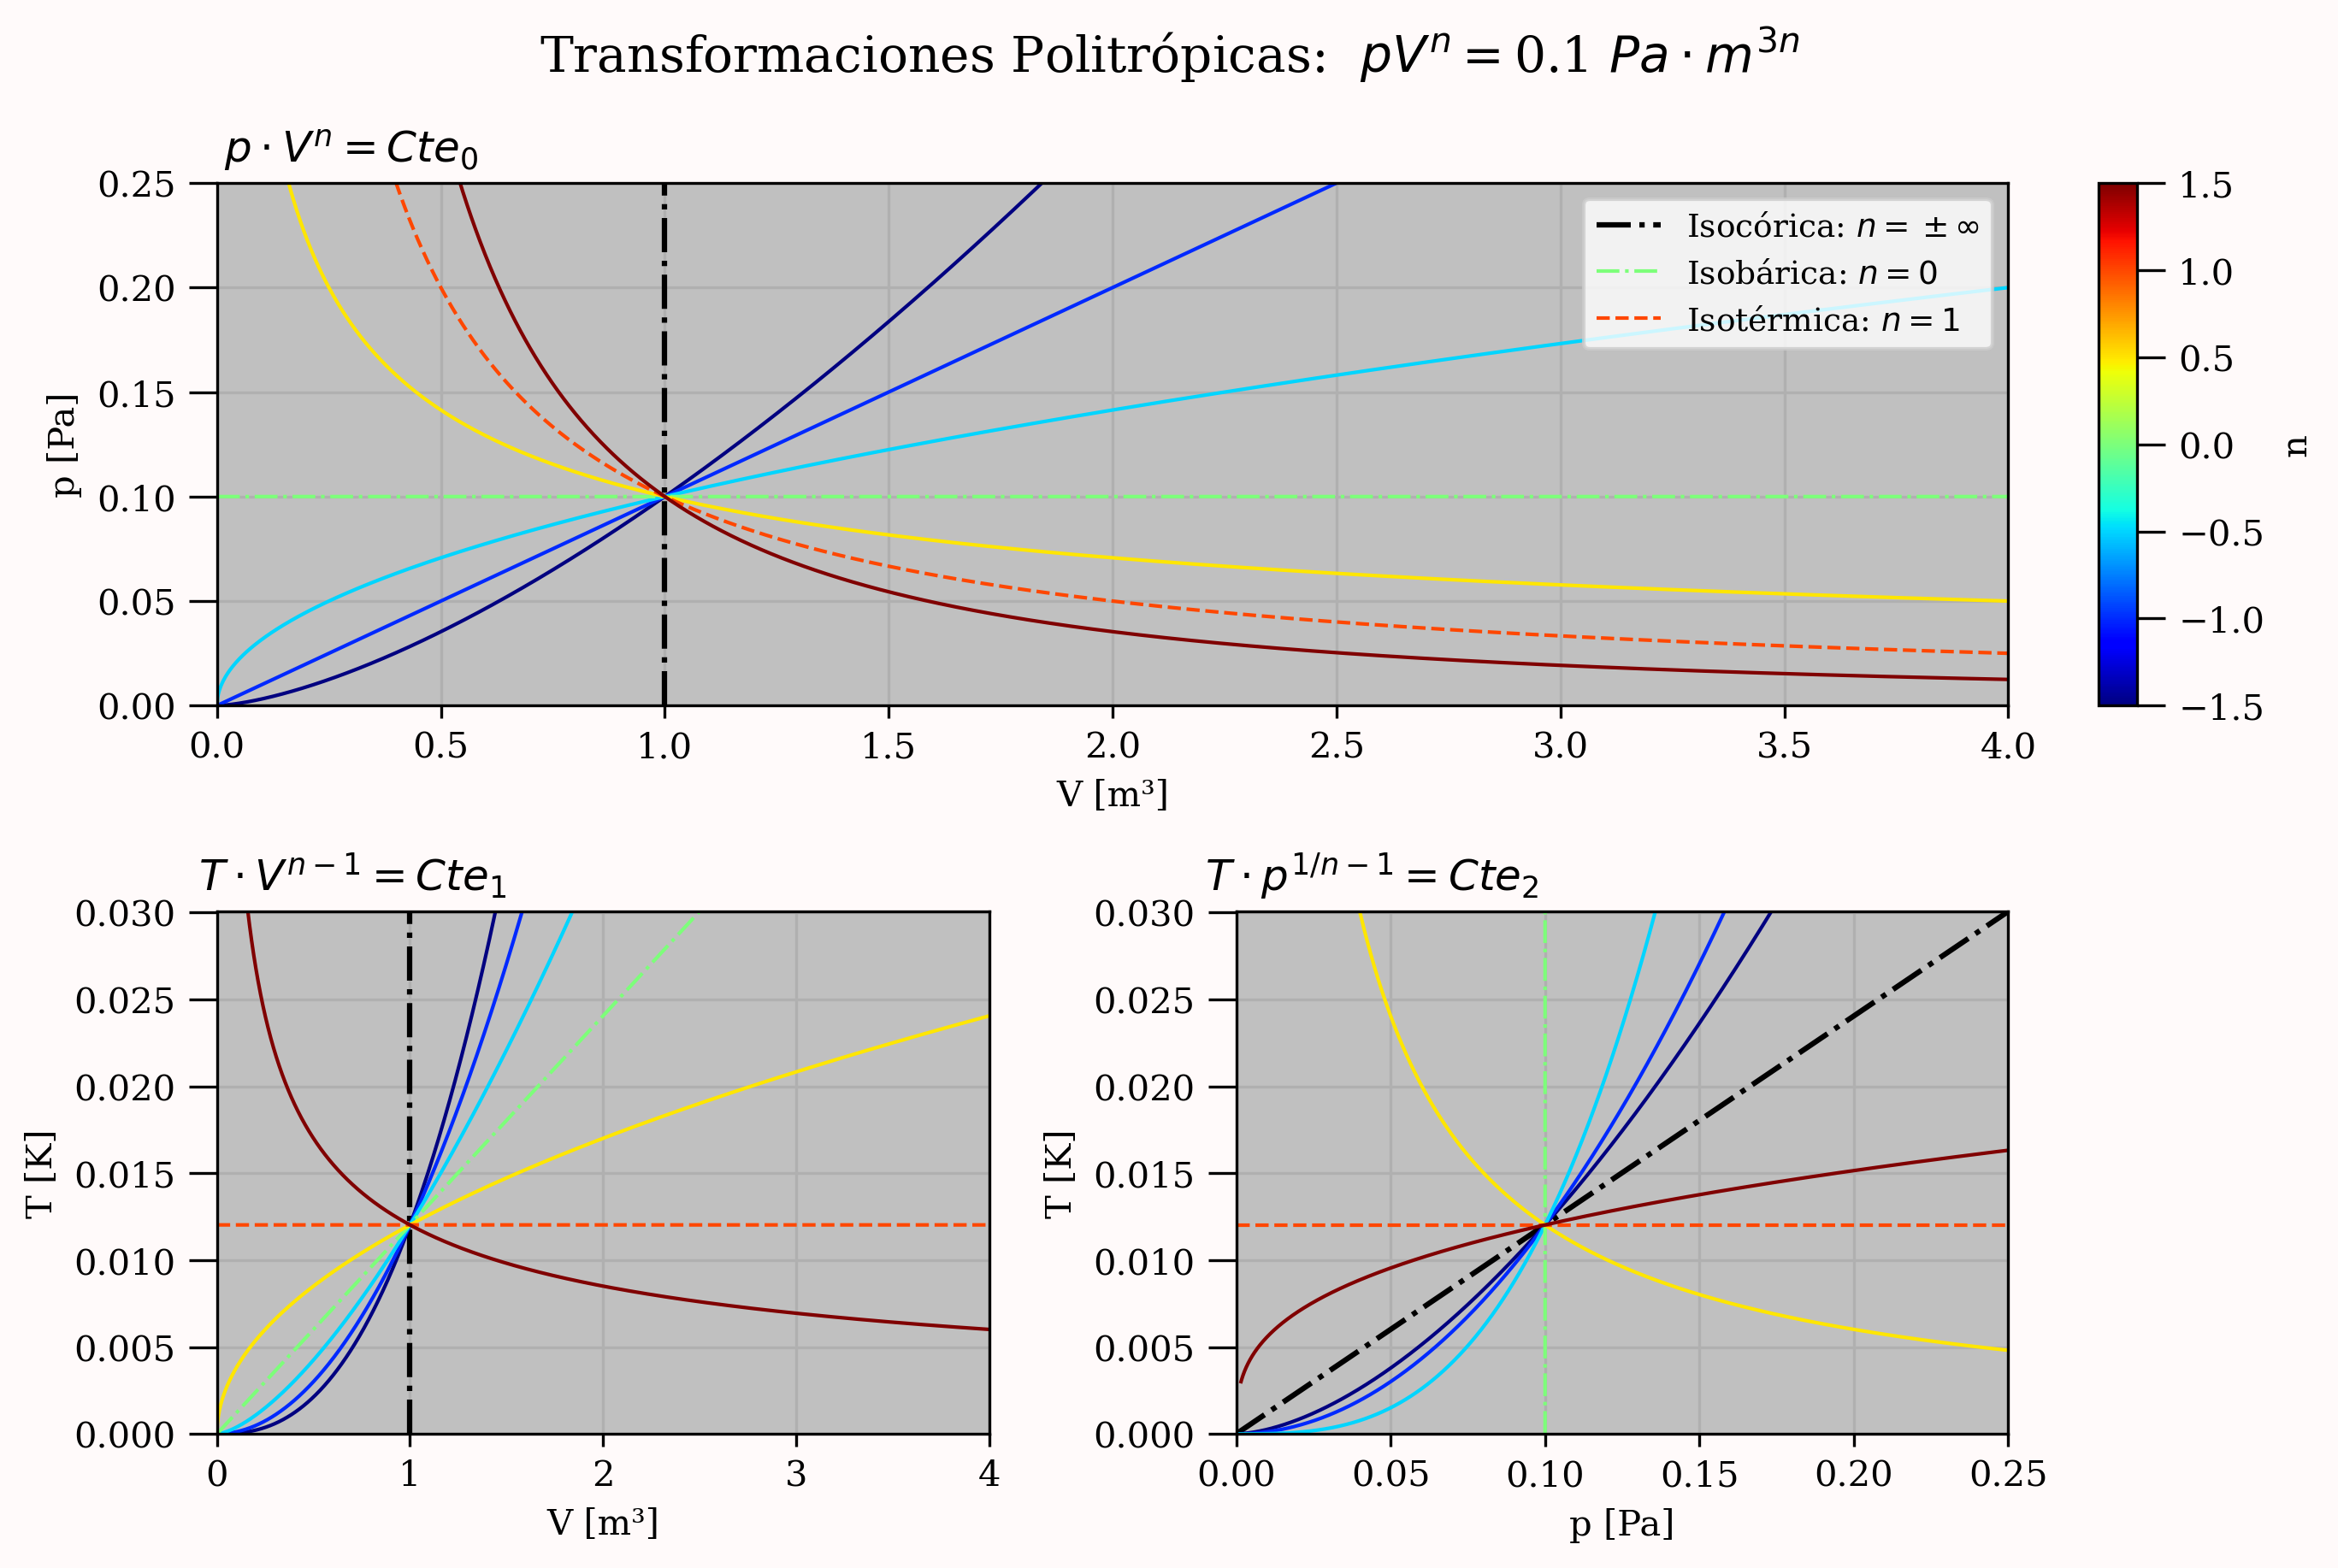

In [ ]:
#@title 1.a)

n_maximo =  1.5#@param ["1.5", "5", "10", "20"] {type:"raw", allow-input: true}
n_minimo = -n_maximo #@param ["0", "-1.5", "-5", "-10", "-20", "-n_maximo"] {type:"raw", allow-input: true}
δ_n =  0.5#@param ["0.25", "0.5", "1", "2"] {type:"raw", allow-input: true}
Cte =  0.10#@param {type:"number"}


# Definí una función porque planeaba generalizarlo pero al final era al pedo y quedó así.
def graficar_politropas(V_min=1e-10, V_max=30, n_min=-1.5, n_max=1.5, delta_n=0.5, C=4):
    n = np.arange(n_min, n_max+delta_n, delta_n)  # dominio de n
    V = np.linspace(1e-10, V_max*4, 10000)  # dominio de V
    # Calculo algunas cantidades para definir los mapas de color del gráfico.
    norm = Normalize(n.min(), n.max())  # Un normalizador que asocia valores del intervalo de n al rango [0:1].
    if n.size > 10:  # Basicamente si n es grande queda mejor con este formato donde las lineas tienen ancho variable y estos colores.
        w = [1.5*(1 - abs(i/(n.size-1)-0.5))**4 for i in range(len(n))]  # Ancho variable
        colorscale = plt.cm.ScalarMappable(norm, 'magma')  # Asocio los valores del rango de n normalizado en [0:1] a una secuencia de colores.
    else:  # Si n es chico queda mejor con este formato donde las lineas tienen ancho siempre el mismo ancho y estos colores.
        w = [1,]*n.size  # Ancho constantemente 1
        colorscale = plt.cm.ScalarMappable(norm, 'jet')  # Asocio los valores del rango de n normalizado en [0:1] a una secuencia de colores.

    colors = colorscale.to_rgba  # El mapa de color que se utilizará al plotear todo. Es una función que recibe un valor de n y devuelve un color

    fig = plt.figure(figsize=(9, 6), constrained_layout=True, facecolor='snow')
    gs = fig.add_gridspec(2, 2)
    axs = [fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]
    fig.suptitle(f'Transformaciones Politrópicas:  $pV^n=${C} $Pa \cdot m'+'^{3n}$', fontsize=14)
    # Caso V cte
    axs[0].axvline(1, ls='-.', c='k', label='Isocórica: $n=\pm\infty$')
    axs[1].axvline(1, ls='-.', c='k')
    axs[2].plot([0, C, C*2.5+0.5], [0, C/cte.R, (C*2.5+0.5)/cte.R], ls='-.', c='k')
    for i, pow in enumerate(n):  # Para cada valor de n, ploteo V contra C/V**n
        p = C/V**pow
        T = C/(cte.R*V**(pow-1))
        if pow == 0:  # Caso p cte
            axs[0].plot(V, p, '-.', c=colors(pow), lw=w[i], label='Isobárica: $n=0$')
            axs[1].plot(V, T, '-.', c=colors(pow), lw=w[i])
            axs[2].plot(p, T, '-.', c=colors(pow), lw=w[i])
        elif pow == 1:  # Caso T cte
            axs[0].plot(V, p, '--', c=colors(pow), lw=w[i], label='Isotérmica: $n=    1$')
            axs[1].plot(V, T, '--', c=colors(pow), lw=w[i])
            axs[2].axhline(T[0], ls='--', c=colors(pow), lw=w[i])
        else:  # Caso general
            axs[0].plot(V, p, c=colors(pow), lw=w[i],)
            axs[1].plot(V, T, c=colors(pow), lw=w[i],)
            axs[2].plot(p, T, c=colors(pow), lw=w[i],)
    axs[0].legend(loc=1)
    axs[0].set_ylim(0, C*2.5)
    axs[0].set_ylabel('p [Pa]')
    axs[0].set_xlim(V_min, V_max)
    axs[0].set_xlabel('V [m³]')
    axs[0].set_title(r'$p \cdot V^n=Cte_0$', x=0.075, y=1)
    plt.colorbar(colorscale, label='n', ax=axs[0])

    axs[1].set_ylim(0, C/cte.R*2.5)
    axs[1].set_ylabel('T [K]')
    axs[1].set_xlim(V_min, V_max)
    axs[1].set_xlabel('V [m³]')
    axs[1].set_title(r'$T \cdot V^{n-1}=Cte_1$', x=0.175, y=1)

    axs[2].set_ylim(0, C/cte.R*2.5)
    axs[2].set_ylabel('T [K]')
    axs[2].set_xlim(0, C*2.5)
    axs[2].set_xlabel('p [Pa]')
    axs[2].set_title(r'$T \cdot p^{1/n-1}=Cte_2$', x=0.175, y=1)
    for ax in axs:
        ax.set_facecolor('silver')
    return fig, axs

fig, axs = graficar_politropas(V_min=1e-10, V_max=4, n_min=n_minimo, n_max=n_maximo, delta_n=δ_n, C=Cte)
plt.show()

W = 21.3 kJ


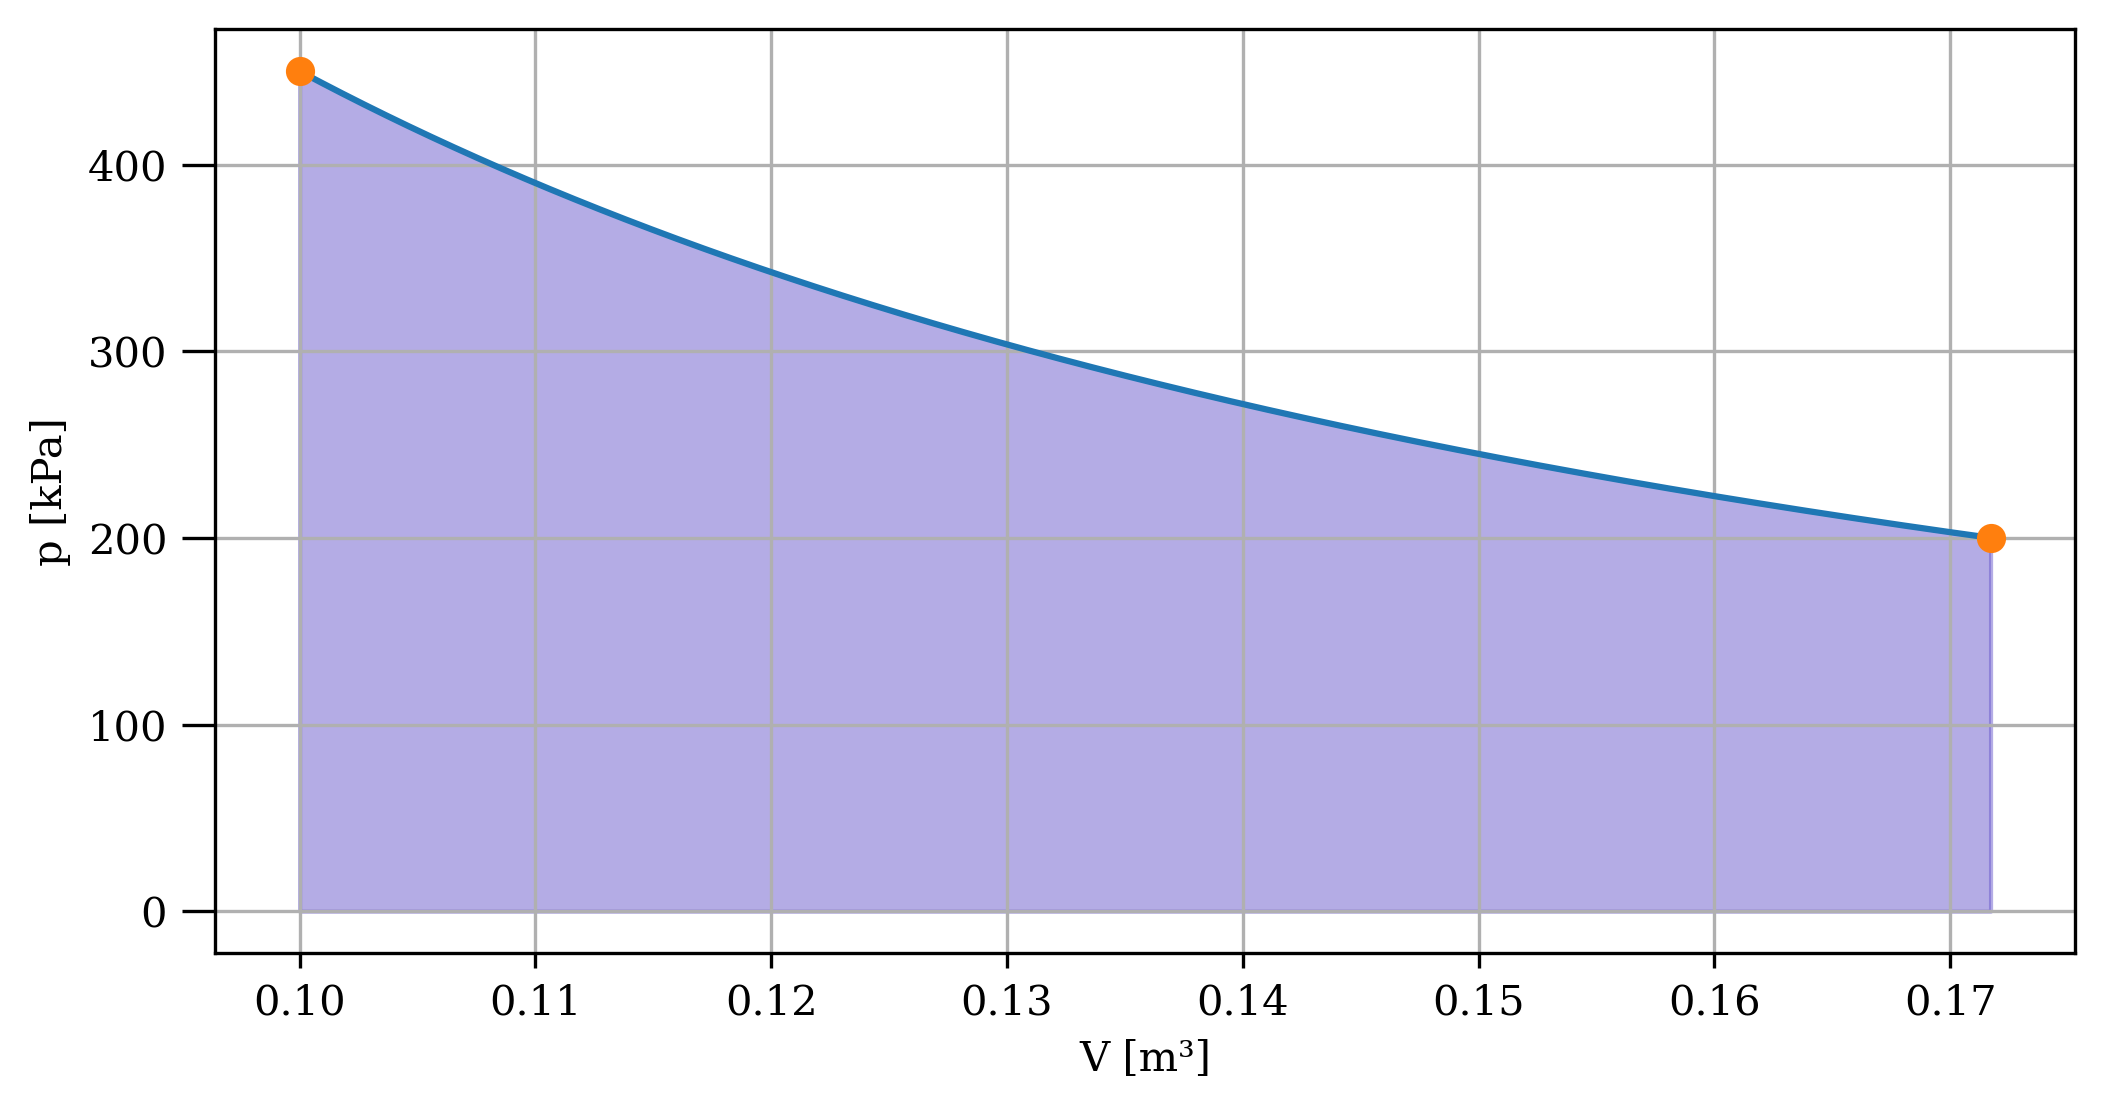

In [ ]:
#@title 2.a)
# Datos:
V0 = 0.1  # m³
p0 = 450e3  # Pa
T0 = 250  # K
pf = 200e3  # Pa

# Constantes de la politrópa
n = 1.5
C = p0*(V0**n)  # Pa·m⁴·⁵
Vf = V0*(p0/pf)**(1/n)  # m³
W = (p0*V0 - pf*Vf)/(n-1)
print(f'W = {W*1e-3:.3g} kJ')
# Grafico la curva del proceso
plt.plot(np.linspace(V0, Vf, 10000), 1e-3*C/np.linspace(V0, Vf, 10000)**n)
plt.fill_between(np.linspace(V0, Vf, 10000), 1e-3*C/np.linspace(V0, Vf, 10000)**n,
                 color='slateblue', alpha=0.5)
plt.plot([V0, Vf], [p0*1e-3, pf*1e-3], 'o')
plt.xlabel('V [m³]')
plt.ylabel('p [kPa]')
plt.show()

W = 123 kJ


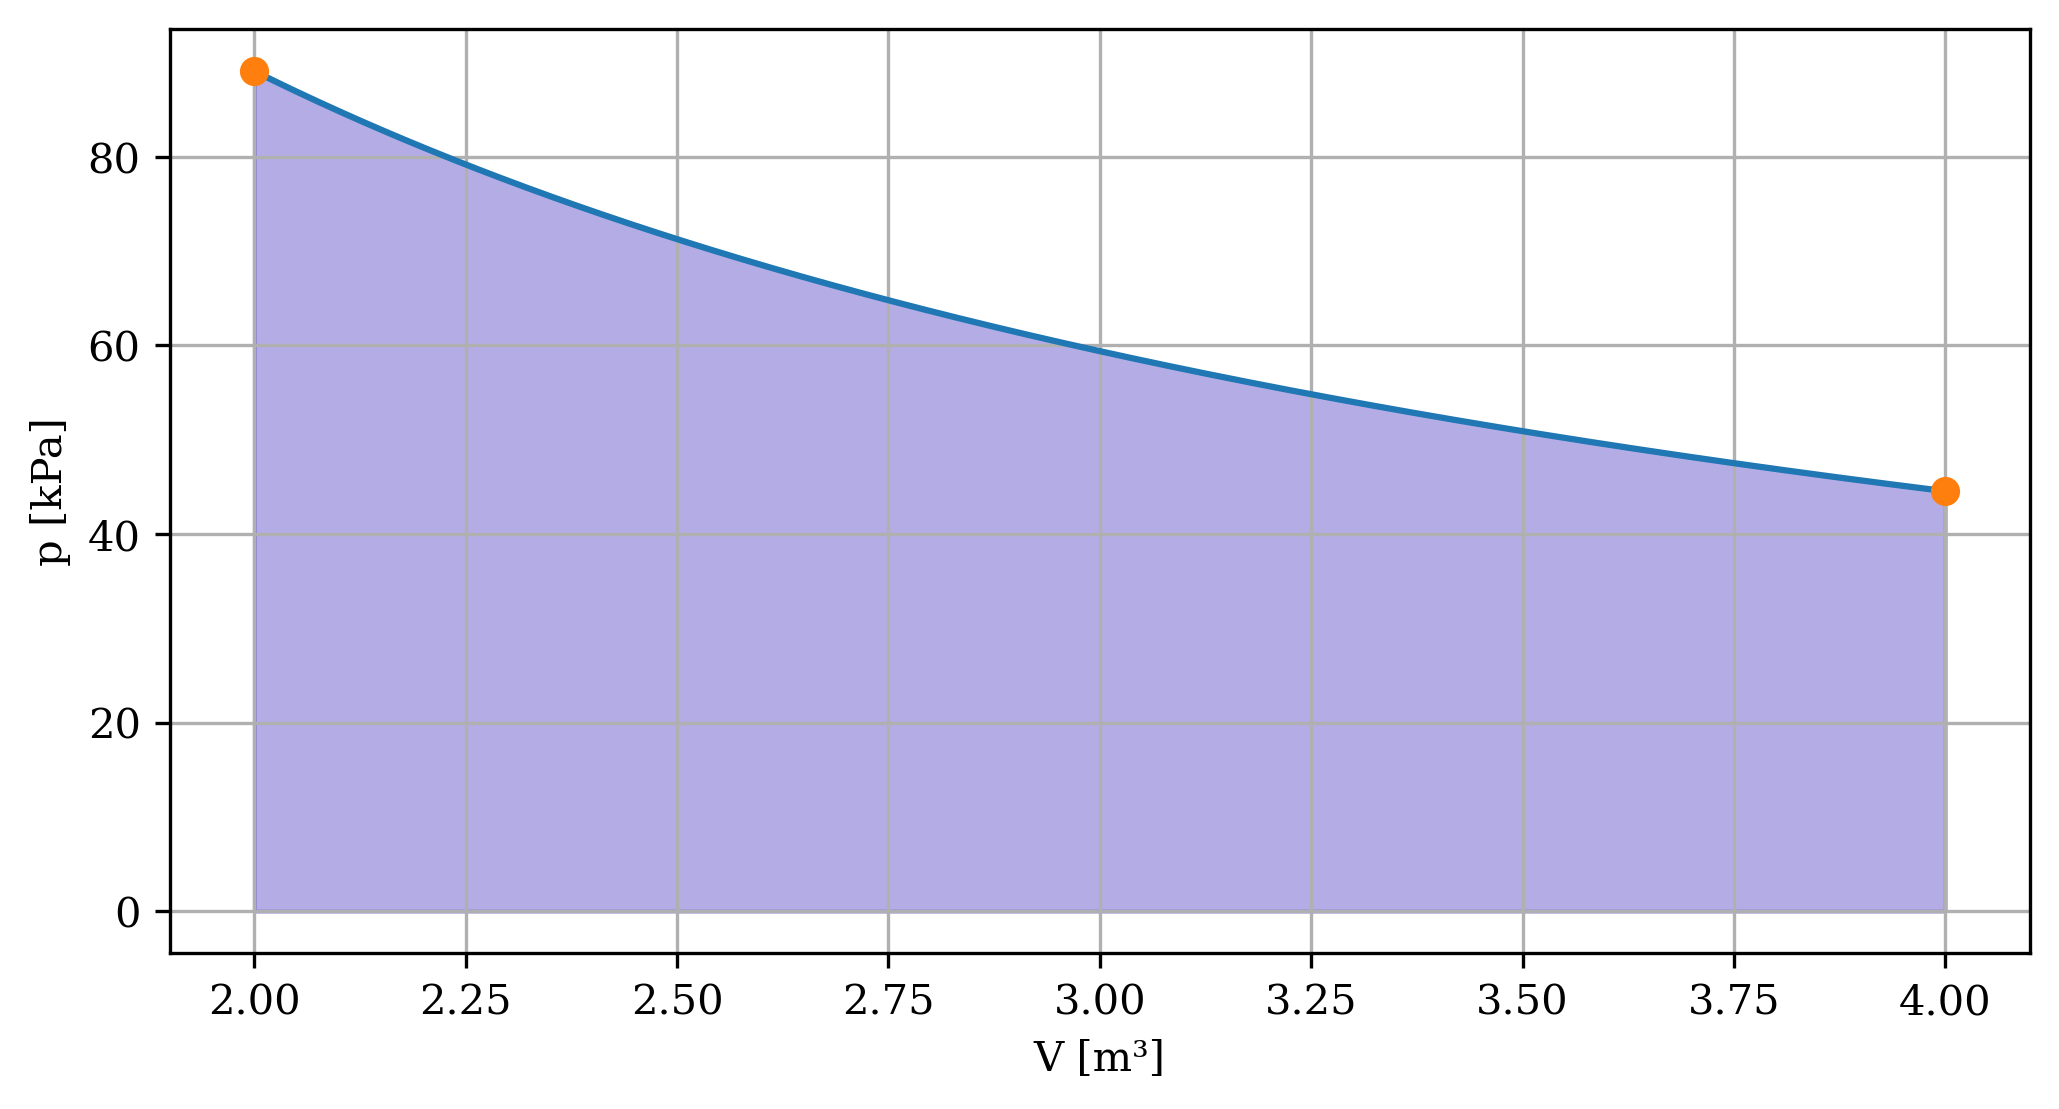

In [ ]:
#@title 2.b)
# Datos:
m = 2e3  # g
M = 28  # g/mol
V0 = 2  # m³
T = 300  # K
Vf = 4  # m³
# Constantes de la politrópa
n = 1
C = m*cte.R*T/M  # J ; Asumiendo Gas Ideal
W = C*np.log(Vf/V0)
print(f'W = {W*1e-3:.3g} kJ')
# Grafico la curva del proceso
plt.plot(np.linspace(V0, Vf, 10000), 1e-3*C/np.linspace(V0, Vf, 10000)**n)
plt.fill_between(np.linspace(V0, Vf, 10000), 1e-3*C/np.linspace(V0, Vf, 10000)**n,
                 color='slateblue', alpha=0.5)
plt.plot([V0, Vf], [C*1e-3/V0, C*1e-3/Vf], 'o')
plt.xlabel('V [m³]')
plt.ylabel('p [kPa]')
plt.show()

In [ ]:
#@title 2.c)
# i)
print('\ni)')
# Datos:
m = 1e3  # g
M = 29  # g/mol
V0 = 0.2  # m³
p0 = 350e3  # Pa
Tf = 411.5  # K
Vf = V0  # m³
Q = 120e3  # J
# Deducciones
T0 = p0*V0*M/(m*cte.R)  # K ; Asumiendo Gas Ideal
W = 0  # J
Delta_U = Q  # J
Cv = Q/(Tf-T0)  # J/K
print(f'Tf = {Tf:.3g} K')
# print(f'T0 = {T0:.3g} K')
print(f'W = {W:.3g} J')
print(f'ΔU = {Delta_U*1e-3:.3g} kJ')
print(f'Cv = {Cv:.3g} J/K')
print(f'Q = {Q*1e-3:.3g} kJ')

# ii)
print('\nii)')
# Datos:
T0 = cte.convert_temperature(600, 'Celsius', 'Kelvin')  # K
V0 = 0.573  # m³
p0 = 0.15e6  # Pa
Vf = 0.414  # m³
Delta_u = -334.4  # kJ/kg
rho0 = 1/1.15936 # kg/m³ : https://www.tlv.com/global/LA/calculator/superheated-steam-table.html
# Deducciones
Tf = T0*Vf/V0  # K ; Asumiendo Gas Ideal
Delta_U = rho0*V0*Delta_u*1e3  # J
W = p0*(Vf-V0) # J
Q = Delta_U + W  # J
cp = Q/((Tf - T0)*rho0*V0)  # J/(kg·K)
print(f'Tf = {Tf:.3g} K = {cte.convert_temperature(Tf, "Kelvin", "Celsius"):.3g} °C')
print(f'T0 = {T0:.3g} K')
print(f'W = {W*1e-3:.3g} kJ')
print(f'ΔU = {Delta_U*1e-3:.3g} kJ')
print(f'cp = {cp*1e-3:.3g} kJ/(kg·K)')
print(f'Q = {Q*1e-3:.3g} kJ')

# iii)
print('\niii)')
# Datos:
cv = 0.511  # J/(g·K)
m = 1e3  # g
mu = 45  # g/mol
p0 = 620e3  # Pa
V0 = 0.15  # m³
Vf = 1  # m³
Q = 0  # J
# Deducciones:
n = m/mu  # moles
gamma = 1 + n*cte.R/(m*cv)
pf = p0*(V0/Vf)**gamma  # Pa
T0 = p0*V0/(n*cte.R)  # K
Tf = pf*Vf/(n*cte.R)  # K
W = -(pf*Vf - p0*V0)/(gamma-1)  # J
Delta_U = -W  # J
print(f'Tf = {Tf:.3g} K = {cte.convert_temperature(Tf, "Kelvin", "Celsius"):.3g} °C')
print(f'W = {W*1e-3:.3g} kJ')
print(f'ΔU = {Delta_U*1e-3:.3g} kJ')
print(f'cv = {cv:.3g} kJ/(kg·K)')
print(f'Q = {Q*1e-3:.3g} kJ')



i)
Tf = 412 K
W = 0 J
ΔU = 120 kJ
Cv = 717 J/K
Q = 120 kJ

ii)
Tf = 631 K = 358 °C
T0 = 873 K
W = -23.8 kJ
ΔU = -165 kJ
cp = 1.58 kJ/(kg·K)
Q = -189 kJ

iii)
Tf = 253 K = -19.7 °C
W = 128 kJ
ΔU = -128 kJ
cv = 0.511 kJ/(kg·K)
Q = 0 kJ


In [ ]:
#@title 2.d)
# Datos:
p1 = 25*cte.bar  # Pa
p2 = 5*cte.bar  # Pa
m = 29  # g
M = 29  # g/mol  : Masa molar del aire
T = 450  # K
# Deducciones:
n = m/M  # mol
V1 = n*cte.R*T/p1  # m³
V2 = n*cte.R*T/p2  # m³
# i)
Q = n*cte.R*T*np.log(V2/V1)  # J
Wa = -Q  # J
# ii)
Wb = p2*(V1 - V2)  # J : Trabajo (negativo) del embolo al expandirse el contenedor

print(f'Wa/Wb ≈ {Wa/Wb:.1g}')
Wb

Wa/Wb ≈ 2


## Guía 3b: Maquinas y Ciclos

In [ ]:
#@title ####```def poli_colors()```
def poli_colors(proceso):
    '''Más colores en: https://matplotlib.org/stable/gallery/color/named_colors.html
    '''
    colors = {'Expansión Isotérmica': 'tab:red', 'Compresión Isotérmica': 'darkorange',
              'Calentamiento Isocórico': 'dodgerblue', 'Enfriamiento Isocórico': 'tab:cyan',
              'Calentamiento Isobárico': 'salmon', 'Enfriamiento Isobárico': 'pink',
              'Expansión Adiabática': 'gray', 'Compresión Adiabática': 'black',}
    return colors[proceso]

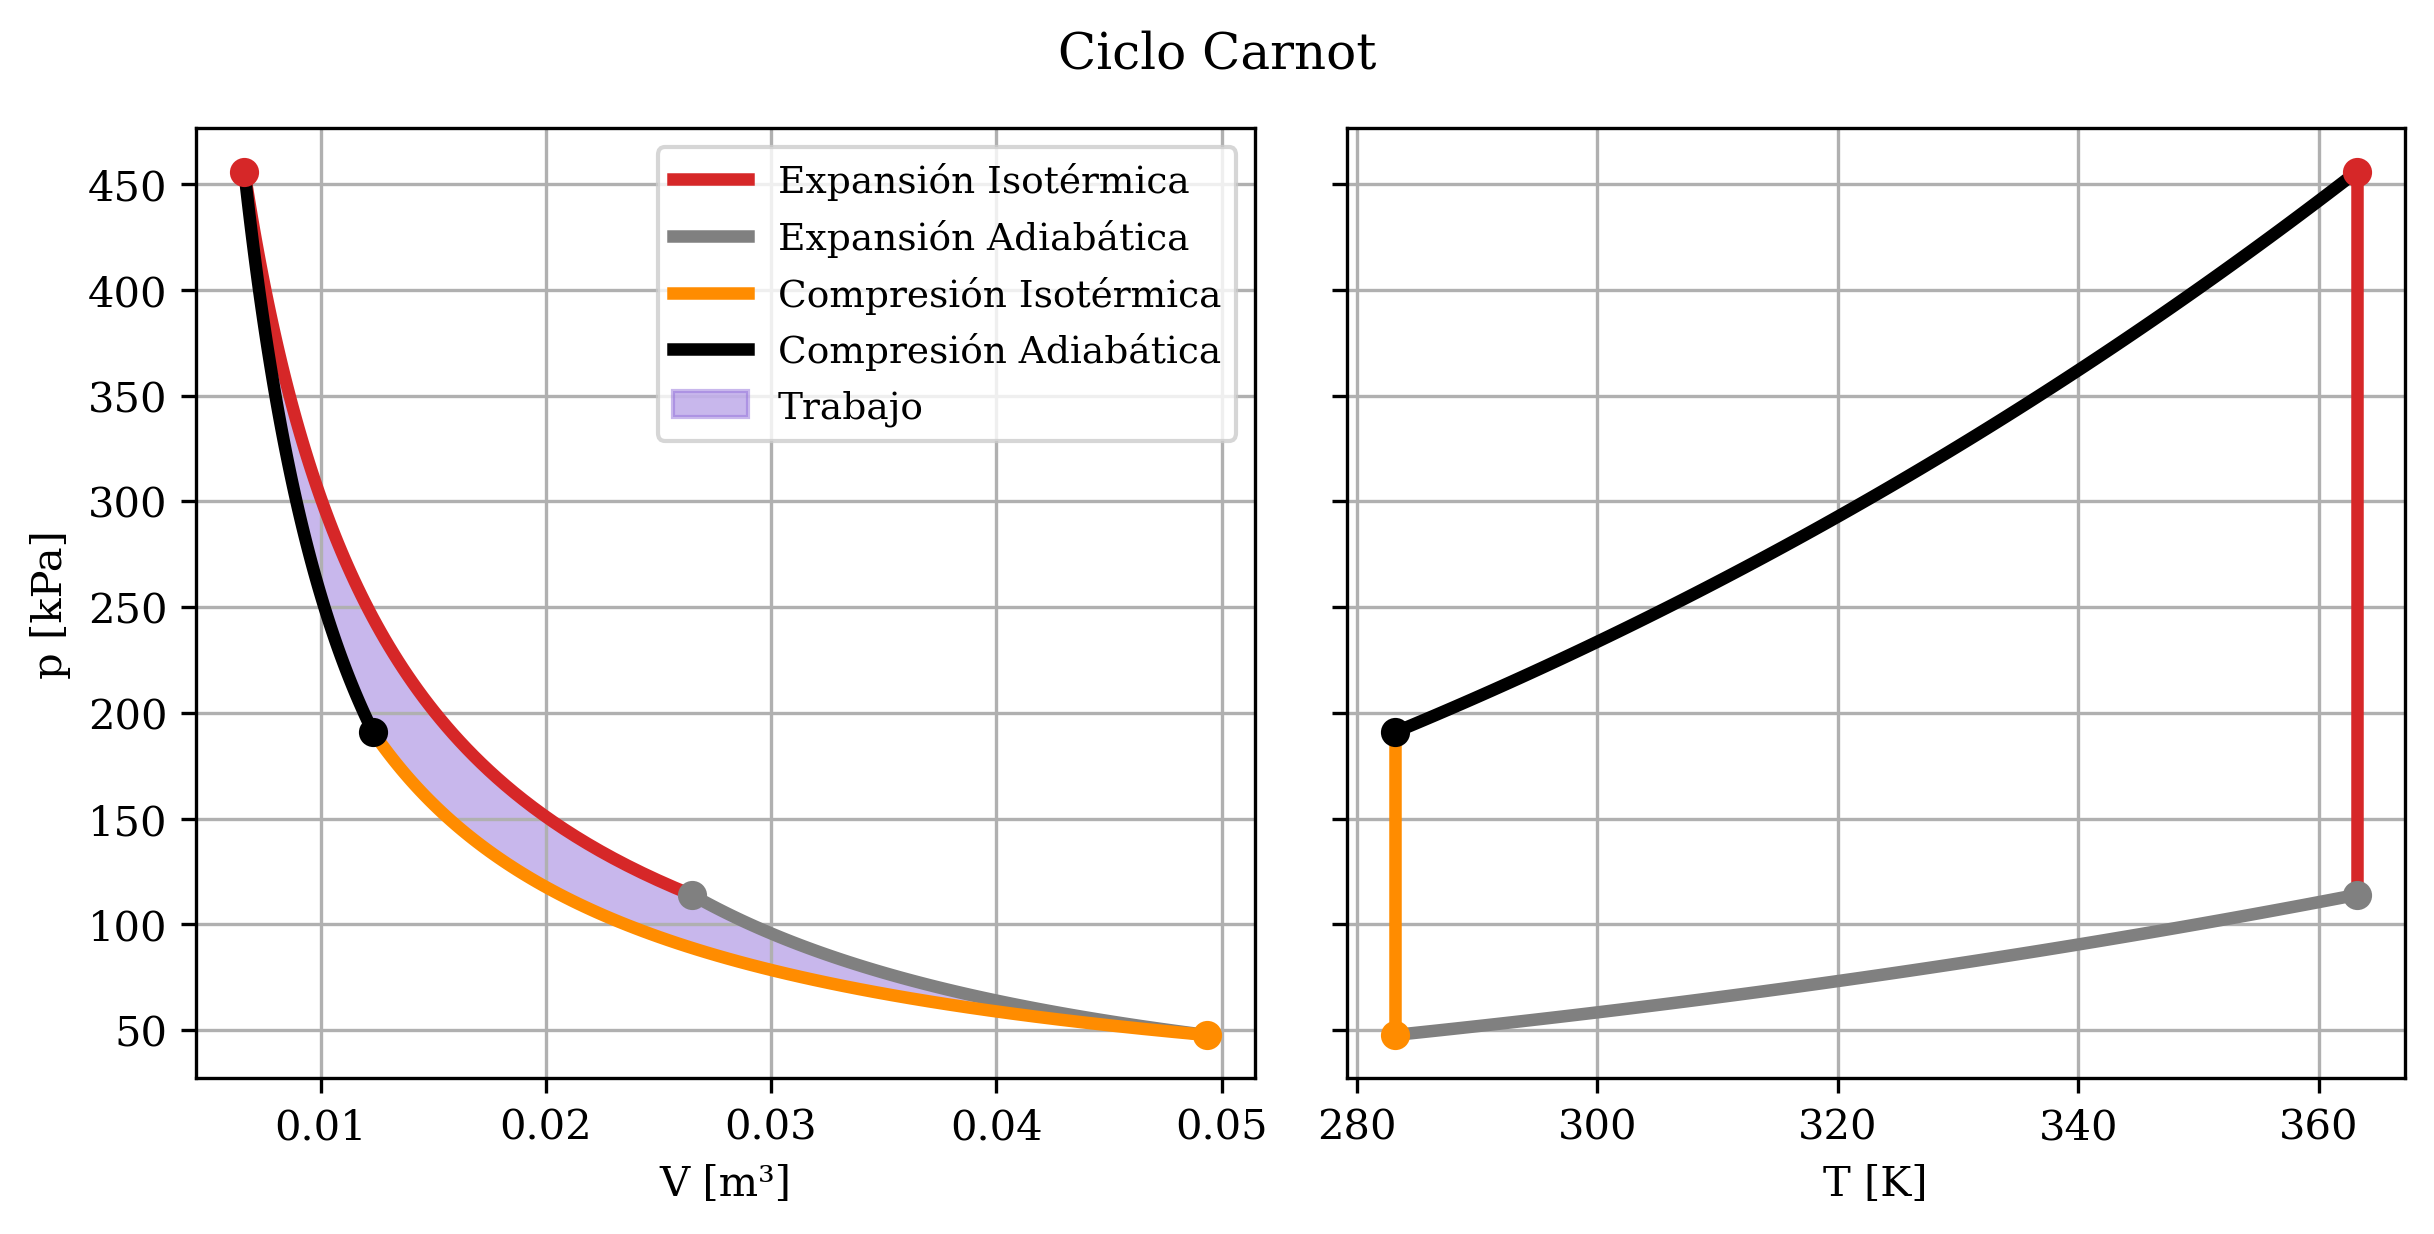

In [ ]:
#@title 1.0) Carnot
res = 100
T2 = Kelvin(90)  # K
T1 = Kelvin(10)  # K
pa = 4.5*cte.atm  # Pa
Va = cte.R*T1/(pa)  # m³
gamma = 1.40  # Coeficiente de dilatación adiabatica del aire seco a 20 °C
pb = 0.25*pa  # Pa


t1, t2, t3, t4 = np.full(res, T2), np.linspace(T2, T1, res), np.full(res, T1), np.linspace(T1, T2, res)  # K
T = np.concatenate([t1, t2, t3, t4])  # K
p1 = np.linspace(pa, pb, res)  # Pa
C2 = T2*(pb**(1/gamma - 1))
p2 = (C2/t2)**(gamma/(1-gamma))  # Pa
C1 = T2*(pa**(1/gamma - 1))
p4 = (C1/t4)**(gamma/(1-gamma))  # Pa
p3 = np.linspace(p2[-1], p4[0], res)  # Pa

p = np.concatenate([p1, p2, p3, p4])  # Pa
V = cte.R*T/p  # m³

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Carnot')
for i, tag in enumerate(['Expansión Isotérmica', 'Expansión Adiabática',
                         'Compresión Isotérmica', 'Compresión Adiabática']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

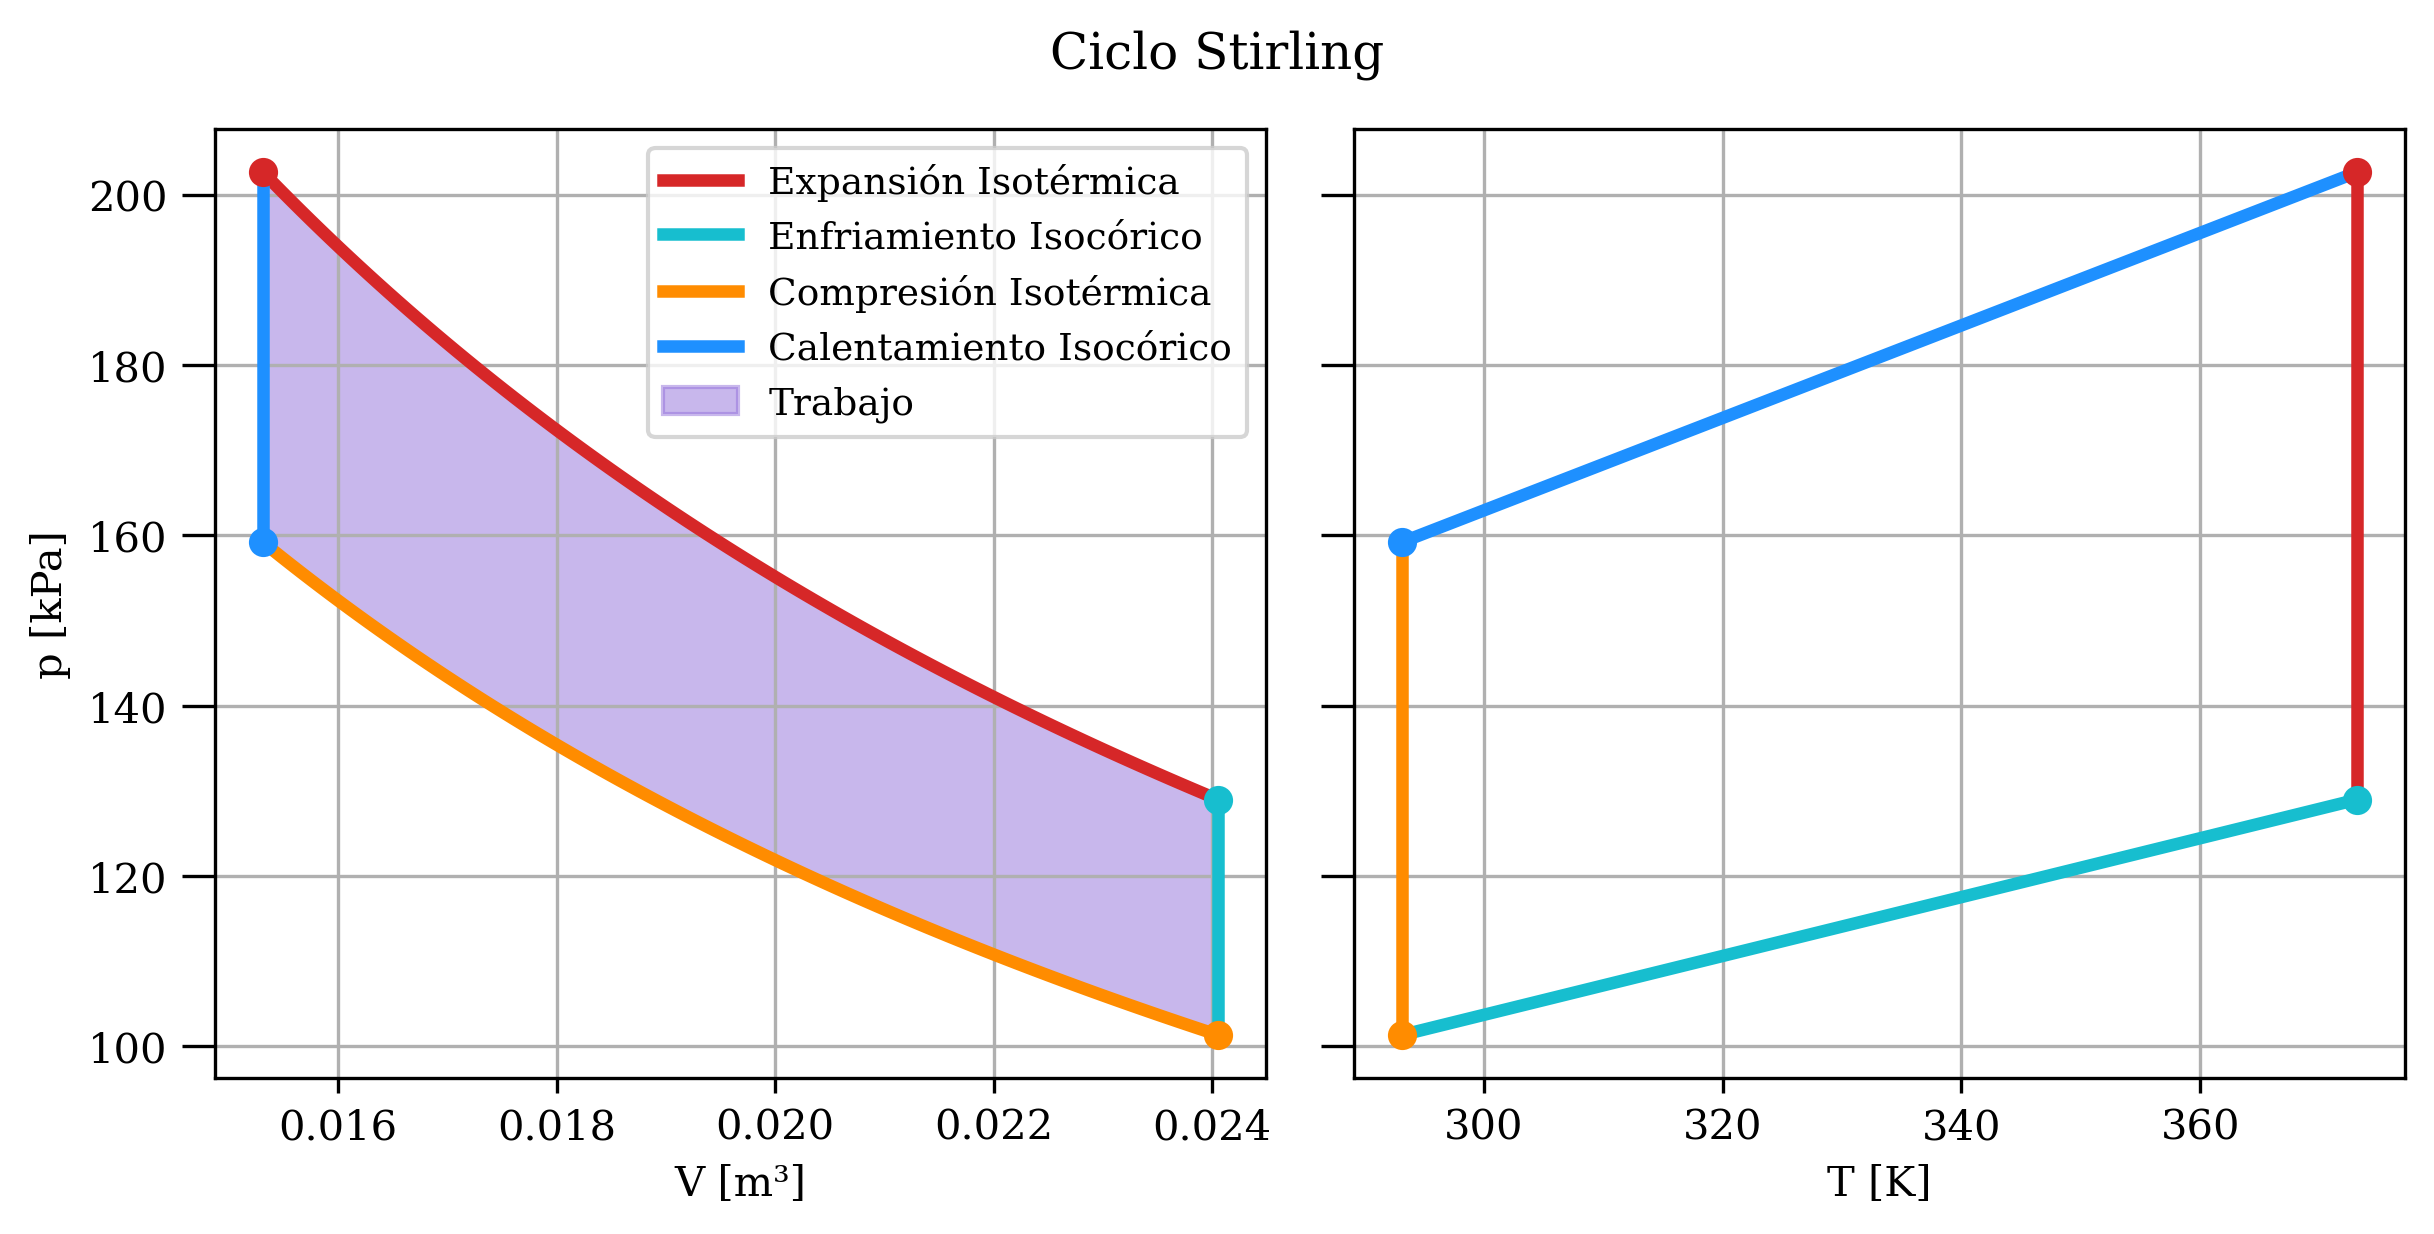

In [ ]:
#@title 1.a) Stirling
res = 100
T1 = Kelvin(100)  # K
T2 = Kelvin(20)  # K
VA = cte.R*T1/(2*cte.atm)  # m³
VB = cte.R*T2/cte.atm  # m³

V = np.concatenate([np.linspace(VA, VB, res), np.full(res, VB),
                    np.linspace(VB, VA, res), np.full(res, VA)])
T = np.concatenate([np.full(res, T1), np.linspace(T1, T2, res),
                    np.full(res, T2), np.linspace(T2, T1, res)])
p = cte.R*T/V

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Stirling')
for i, tag in enumerate(['Expansión Isotérmica', 'Enfriamiento Isocórico',
                         'Compresión Isotérmica', 'Calentamiento Isocórico']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

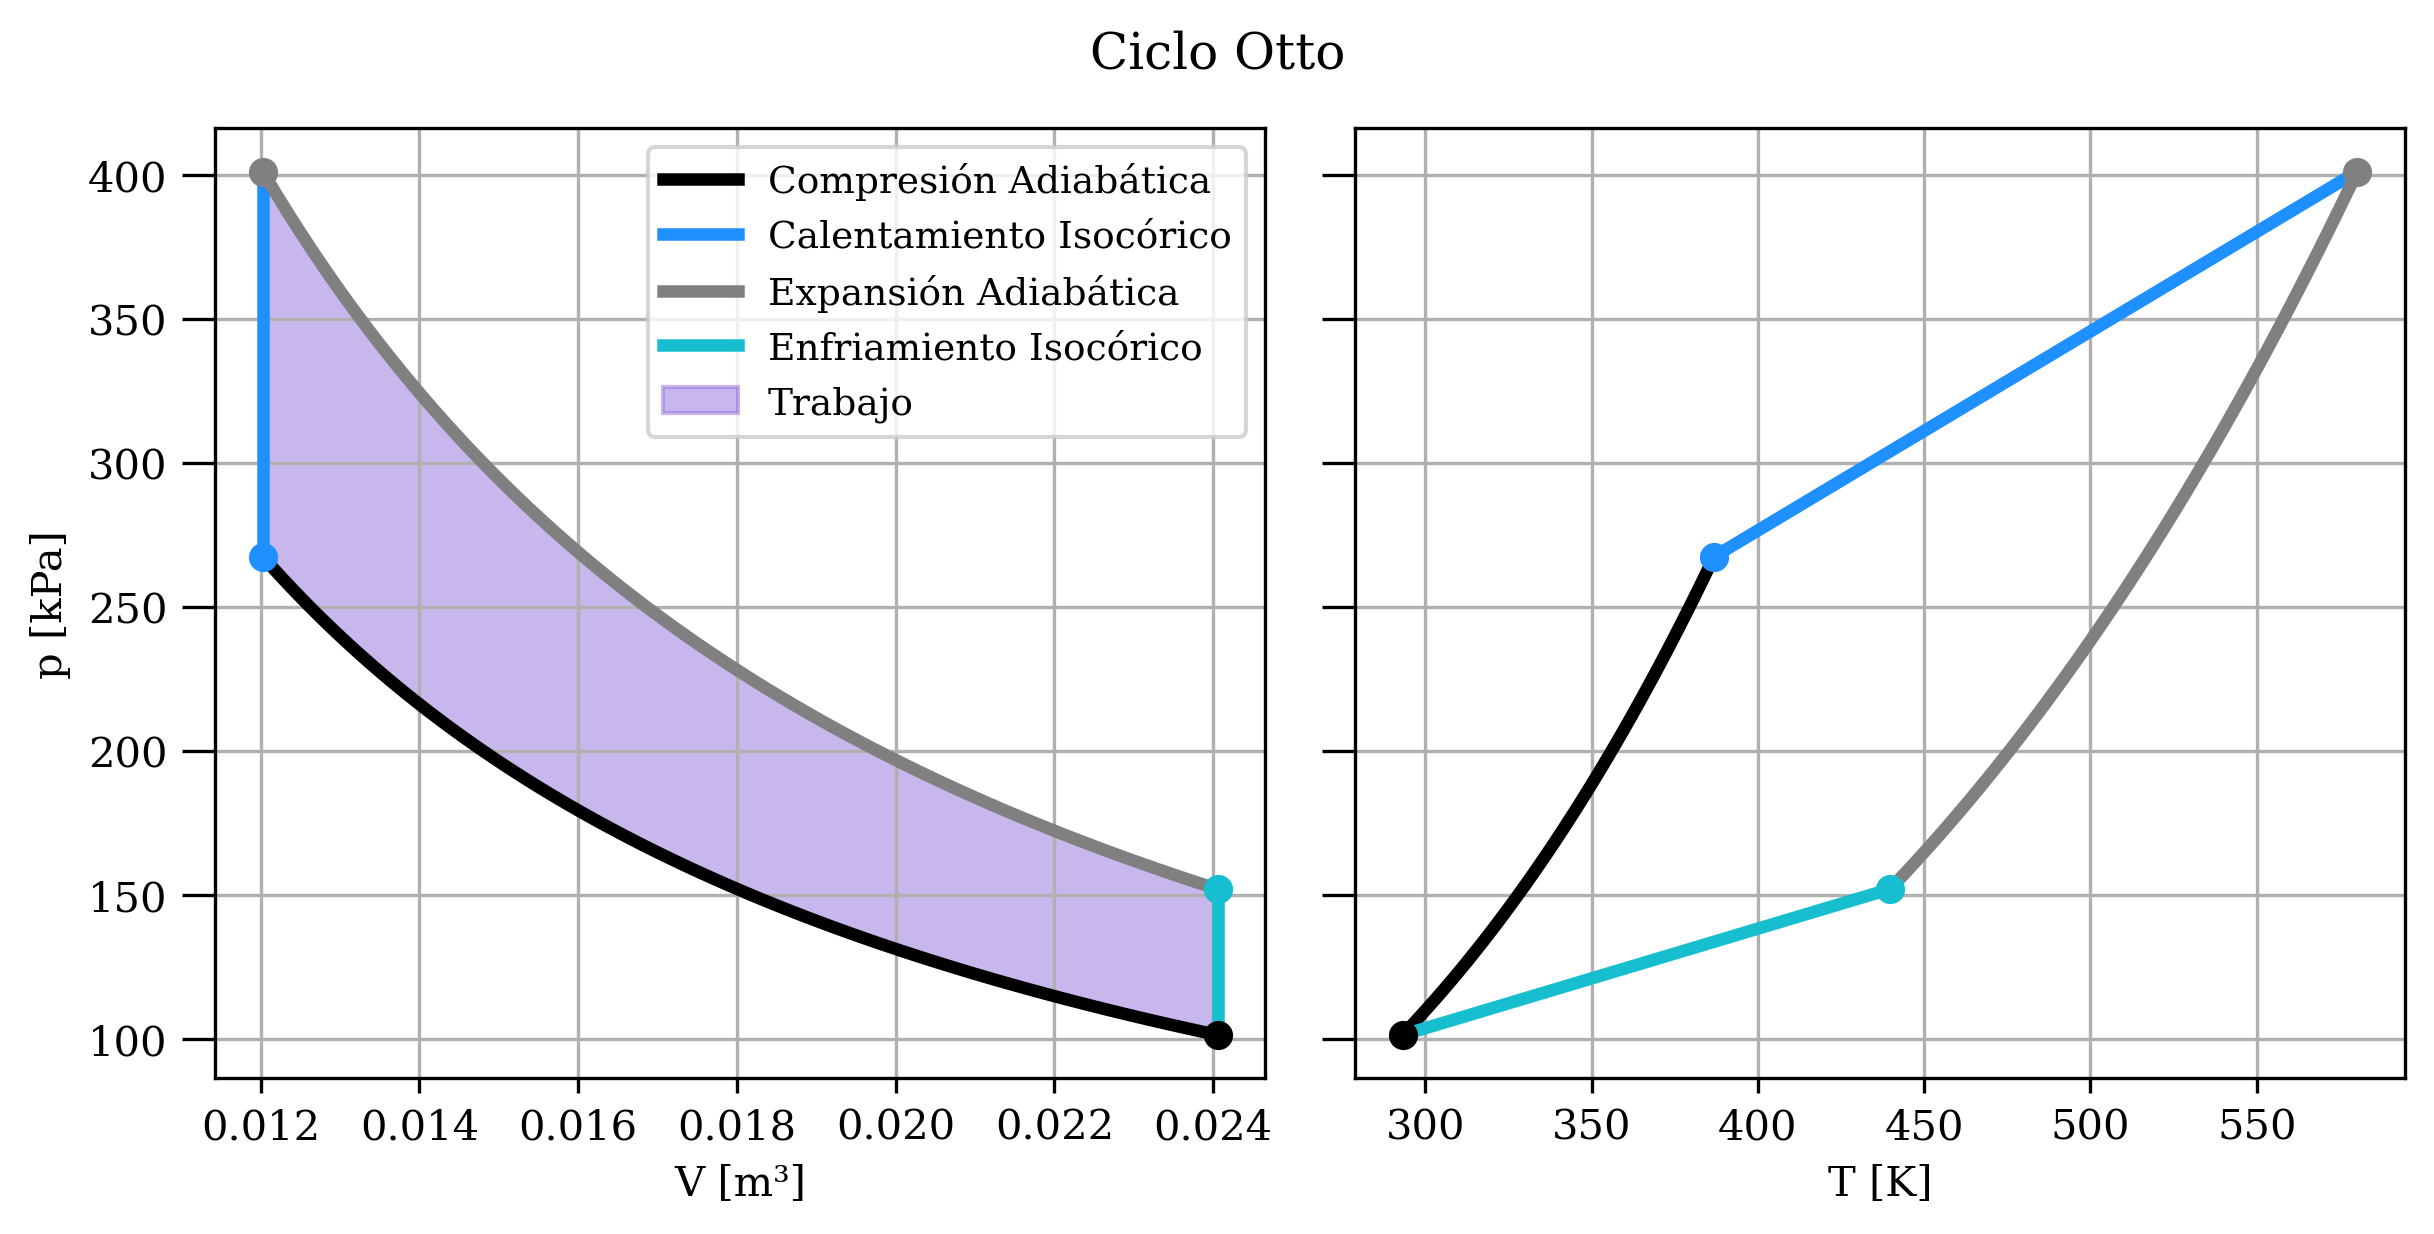

In [ ]:
#@title 1.b) Otto
res = 100

Ta = Kelvin(20)  # K
pa = cte.atm  # Pa
VA = cte.R*Ta/pa  # m³
gamma = 1.40  # Coeficiente de dilatación adiabatica del aire seco a 20 °C
C1 = pa*(VA**gamma)
VB = VA/2  # m³

v1, v2, v3, v4 = np.linspace(VA, VB, res), np.full(res, VB), np.linspace(VB, VA, res), np.full(res, VA)  # m³
V = np.concatenate([v1, v2, v3, v4])  # m³
p1 = C1/(v1**gamma)  # Pa
p2 = np.linspace(p1[-1], p1[-1]*1.5, res)  # Pa
C2 = p2[-1]*(VB**gamma)
p3 = C2/(v3**gamma)
p4 = np.linspace(p3[-1], pa, res)  # Pa
p = np.concatenate([p1, p2, p3, p4])  # Pa
T = p*V/cte.R

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Otto')
for i, tag in enumerate(['Compresión Adiabática', 'Calentamiento Isocórico',
                         'Expansión Adiabática', 'Enfriamiento Isocórico']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

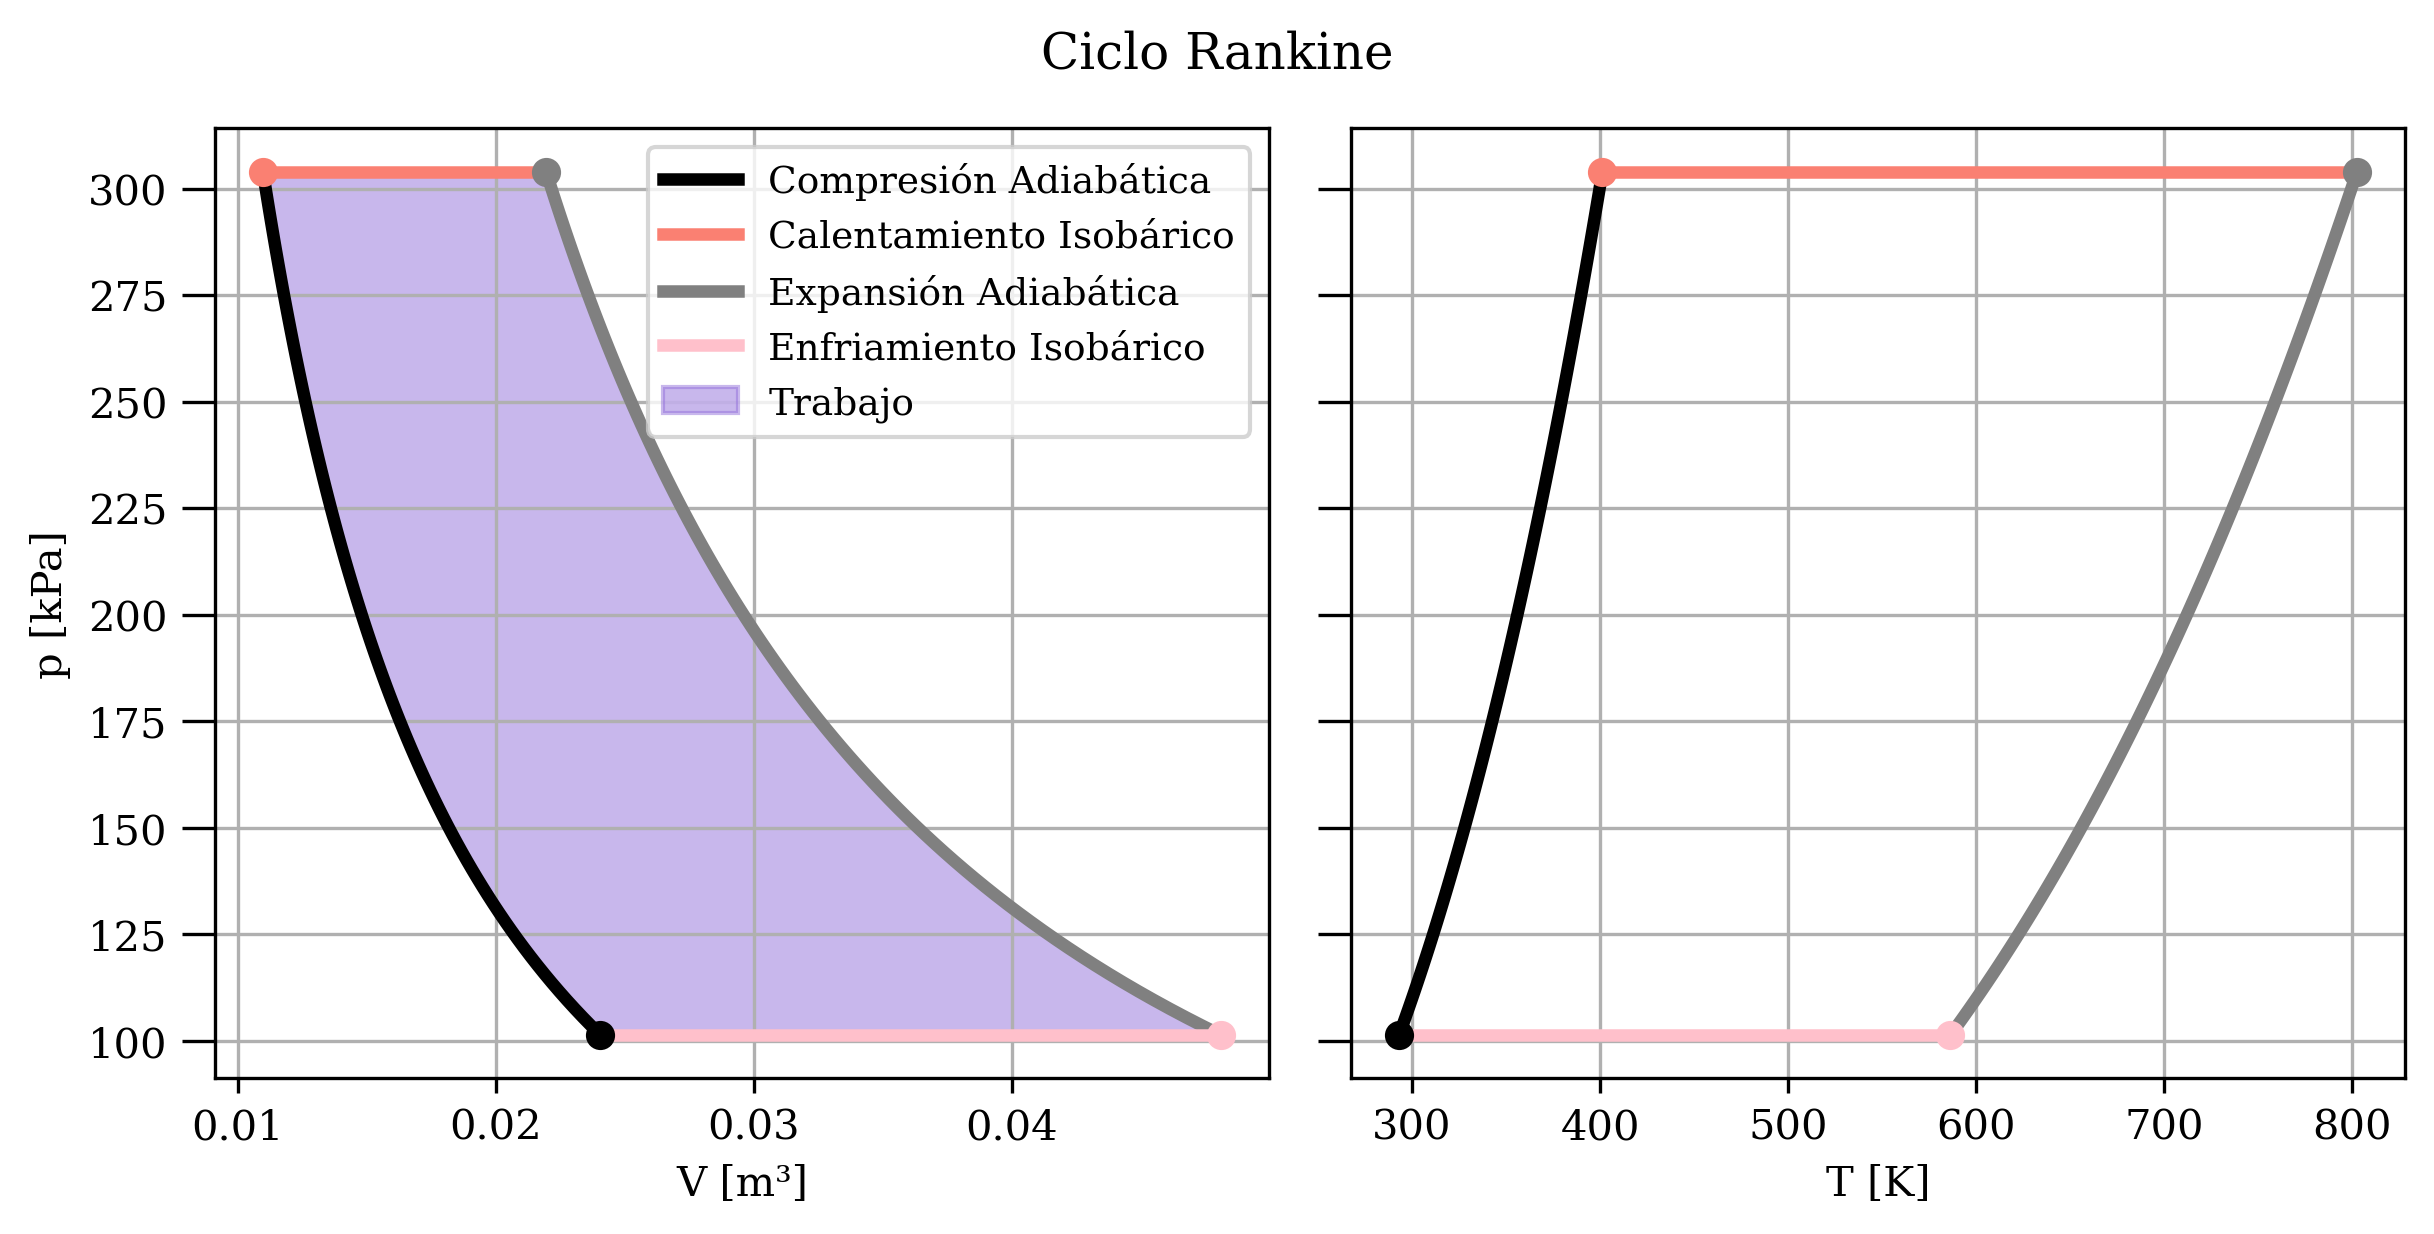

In [ ]:
#@title 1.c) Rankine
res = 100

Ta = Kelvin(20)  # K
pa = cte.atm  # Pa
Va = cte.R*Ta/pa  # m³
gamma = 1.40  # Coeficiente de dilatación adiabatica del aire seco a 20 °C
C1 = pa*(Va**gamma)
pb = pa*3  # Pa

p1, p2, p3, p4 = np.linspace(pa, pb, res), np.full(res, pb), np.linspace(pb, pa, res), np.full(res, pa)  # Pa
p = np.concatenate([p1, p2, p3, p4])  # Pa
v1 = (C1/p1)**(1/gamma)  # m³
v2 = np.linspace(v1[-1], v1[-1]*2, res)  # m³
C2 = pb*(v2[-1]**gamma)
v3 = (C2/p3)**(1/gamma)  # m³
v4 = np.linspace(v3[-1], Va, res)  # Pa
V = np.concatenate([v1, v2, v3, v4])  # m³
T = p*V/cte.R  # K

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Rankine')
for i, tag in enumerate(['Compresión Adiabática', 'Calentamiento Isobárico',
                         'Expansión Adiabática', 'Enfriamiento Isobárico']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

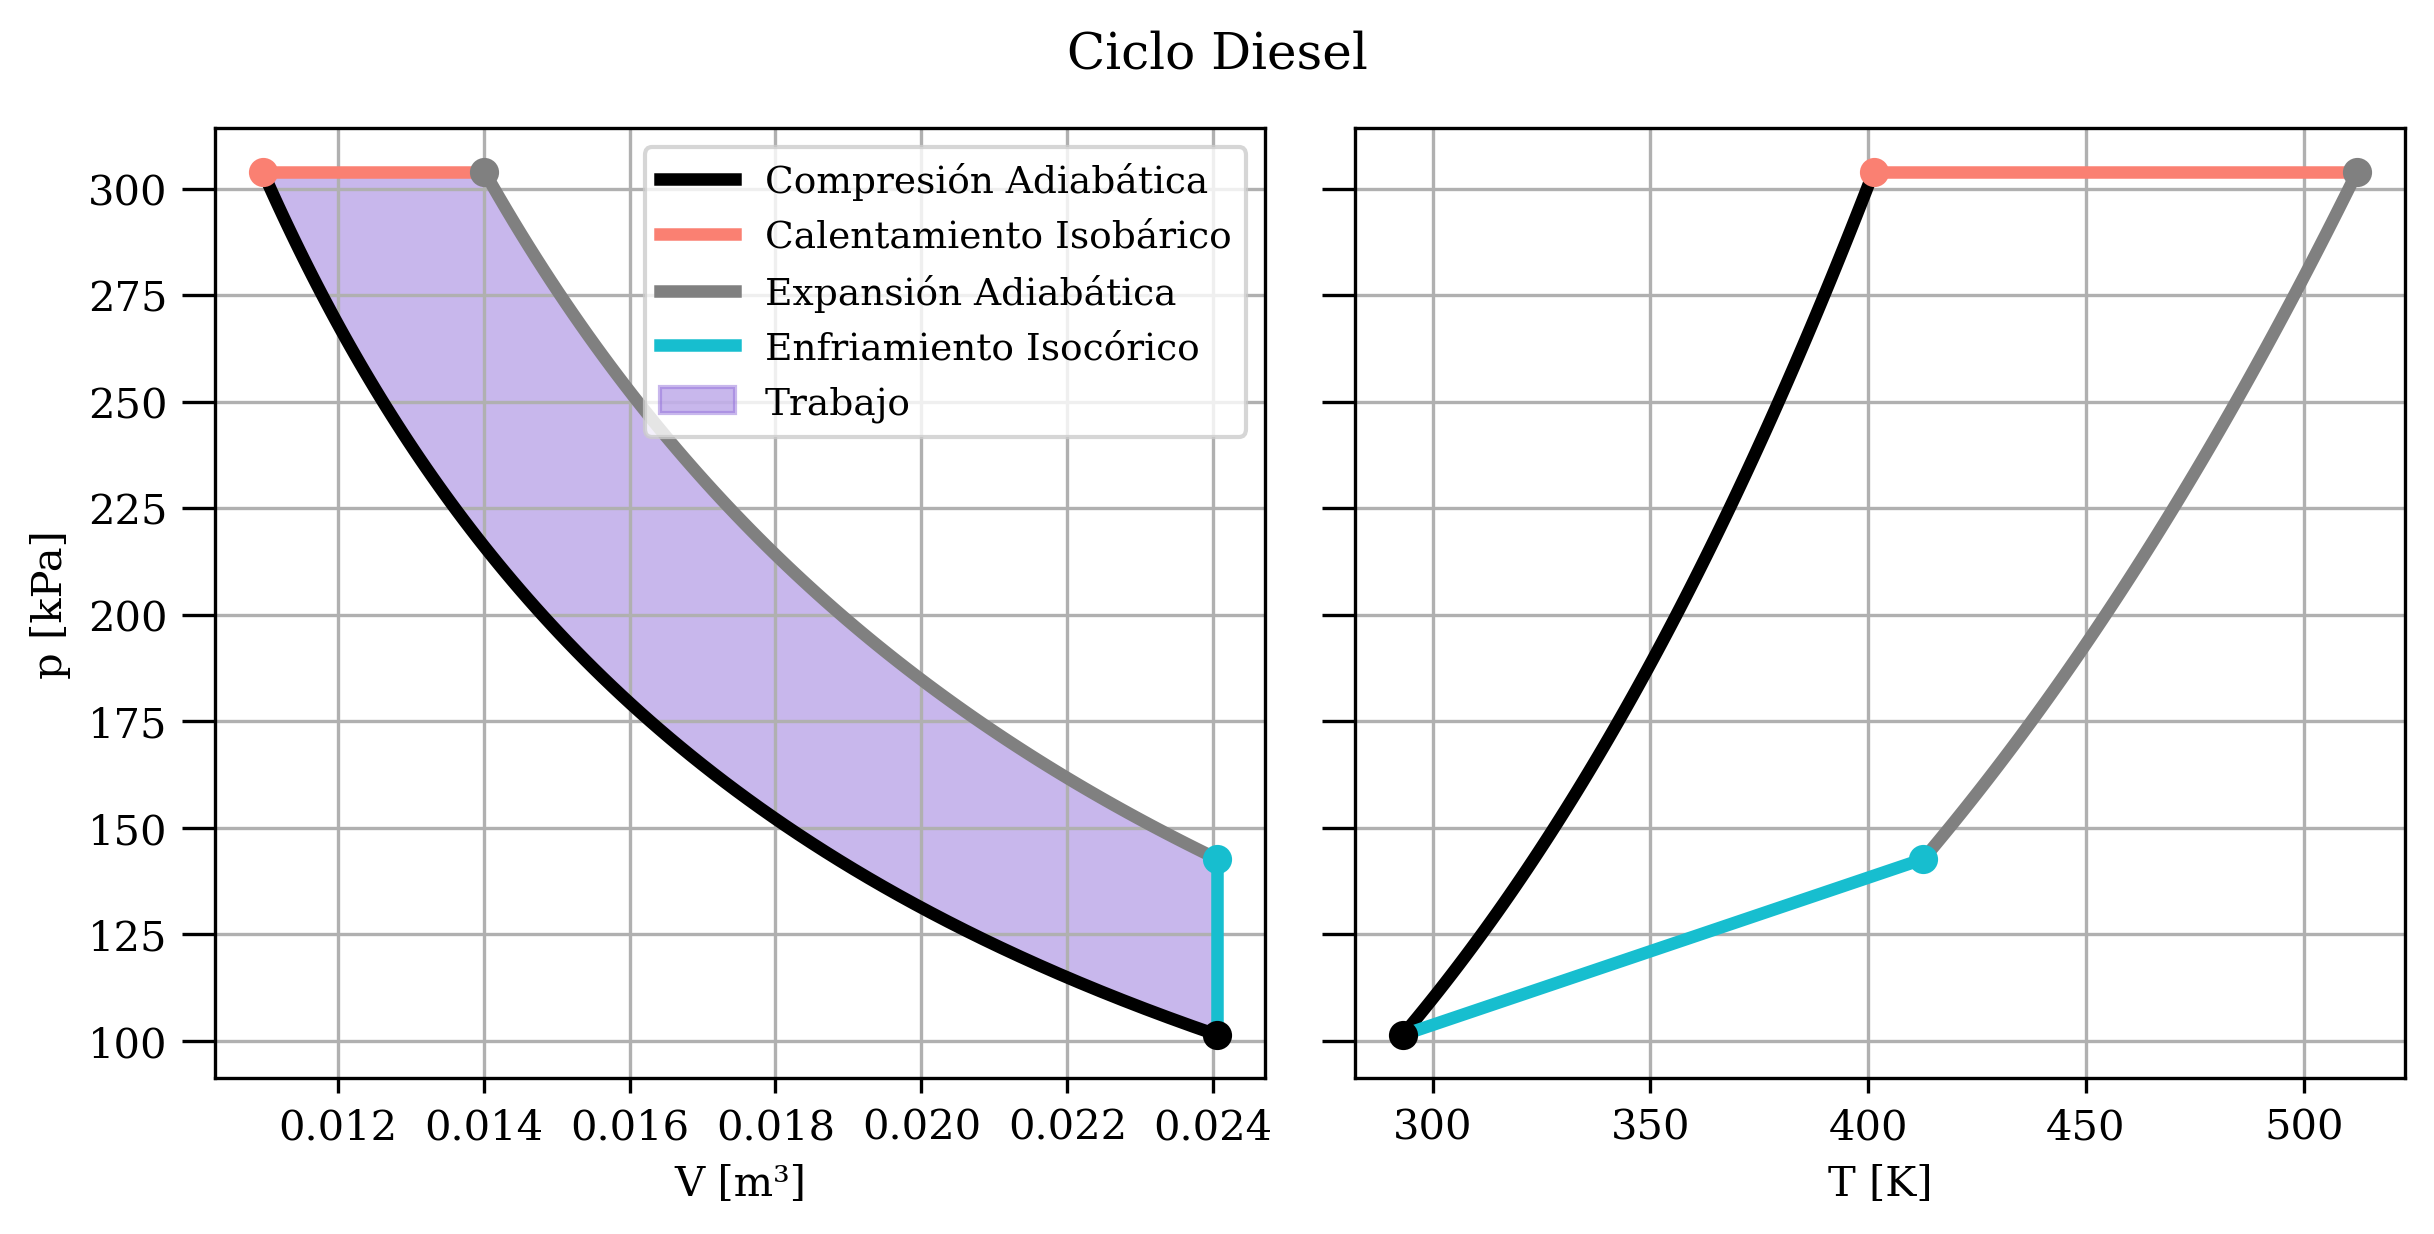

In [ ]:
#@title 1.d) Diesel
res = 100

Ta = Kelvin(20)  # K
pa = cte.atm  # Pa
Va = cte.R*Ta/pa  # m³
gamma = 1.40  # Coeficiente de dilatación adiabatica del aire seco a 20 °C
C1 = pa*(Va**gamma)
pb = pa*3  # Pa

p1, p2 = np.linspace(pa, pb, res), np.full(res, pb)  # Pa
v1 = (C1/p1)**(1/gamma)  # m³
v2 = np.linspace(v1[-1], (v1[-1]+Va)*0.8/2, res)  # m³
C2 = pb*(v2[-1]**gamma)
v3, v4 = np.linspace(v2[-1], Va, res), np.full(res, Va)  # m³
p3 = C2/(v3**gamma)  # Pa
p4 = np.linspace(p3[-1], pa, res)  # Pa
p = np.concatenate([p1, p2, p3, p4])  # Pa
V = np.concatenate([v1, v2, v3, v4])  # m³
T = p*V/cte.R  # K

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Diesel')
for i, tag in enumerate(['Compresión Adiabática', 'Calentamiento Isobárico',
                         'Expansión Adiabática', 'Enfriamiento Isocórico']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

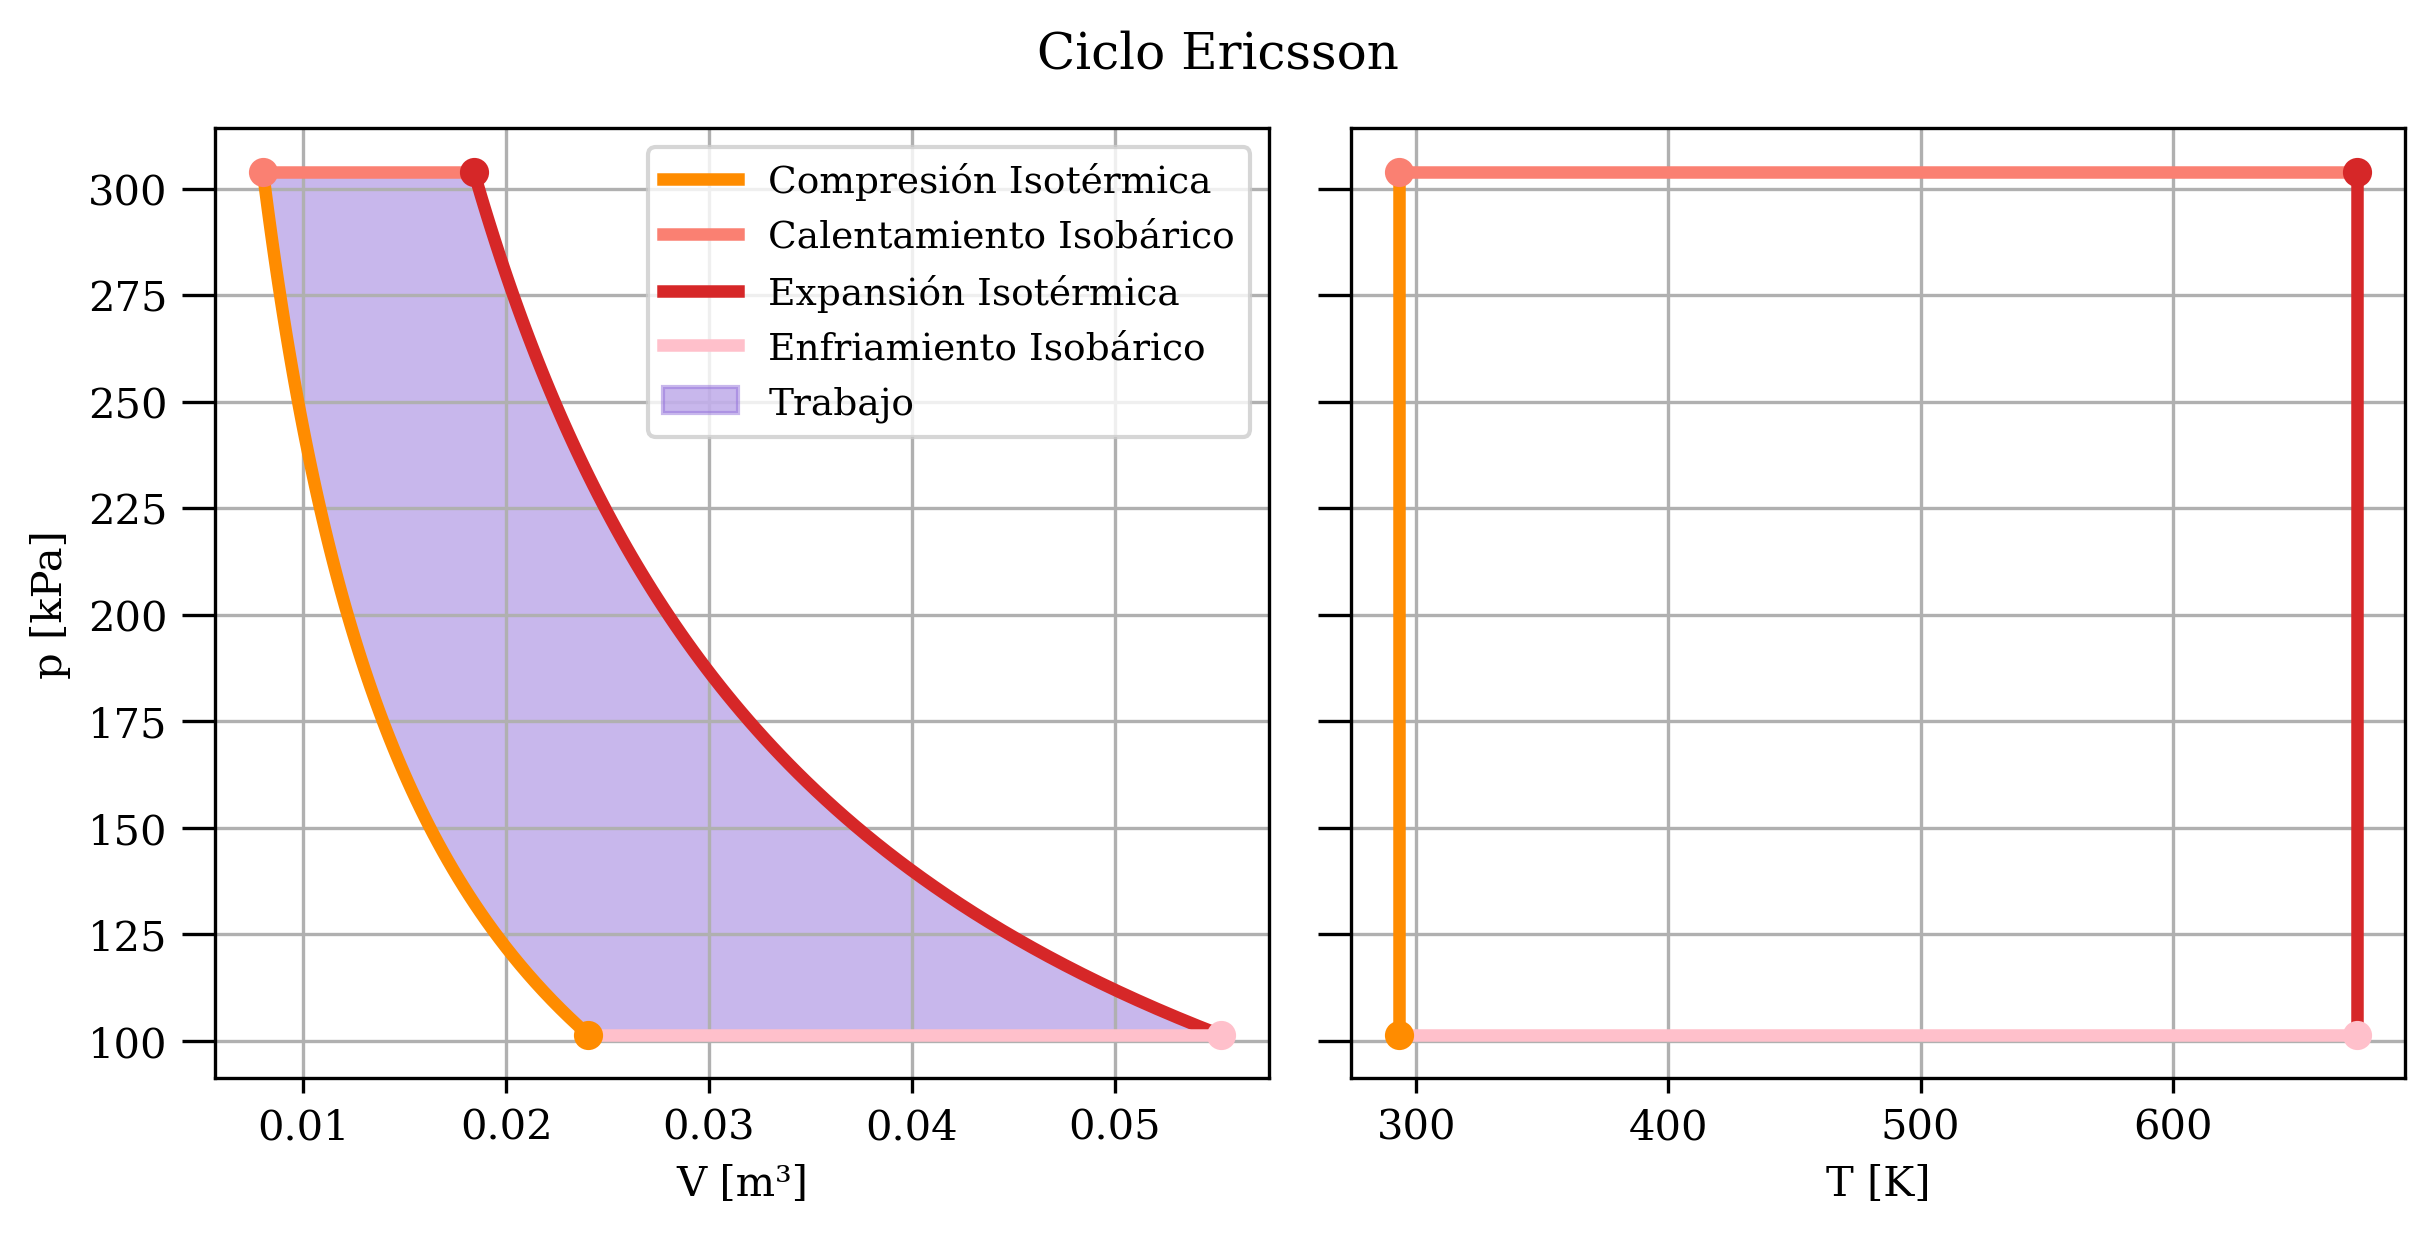

In [ ]:
#@title 1.e) Ericsson
res = 100

T2 = Kelvin(20)  # K
pa = cte.atm  # Pa
Va = cte.R*T2/pa  # m³
T1 = Kelvin(400)  # K
pb = pa*3  # Pa

p1, p2, p3, p4 = np.linspace(pa, pb, res), np.full(res, pb), np.linspace(pb, pa, res), np.full(res, pa)  # Pa
p = np.concatenate([p1, p2, p3, p4])  # Pa
t1, t2, t3, t4 = np.full(res, T2), np.linspace(T2, T1, res), np.full(res, T1), np.linspace(T1, T2, res)  # K
T = np.concatenate([t1, t2, t3, t4])  # K
V = cte.R*T/p  # m³

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
fig.suptitle('Ciclo Ericsson')
for i, tag in enumerate(['Compresión Isotérmica', 'Calentamiento Isobárico',
                         'Expansión Isotérmica', 'Enfriamiento Isobárico']):
    axs[0].plot(V[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[0].plot(V[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
    axs[1].plot(T[i*res:(i+1)*res], 1e-3*p[i*res:(i+1)*res],
                c=poli_colors(tag), lw=3, label=tag, zorder=3)
    axs[1].plot(T[i*res], 1e-3*p[i*res], 'o', c=poli_colors(tag), zorder=4)
axs[0].add_patch(Polygon(np.column_stack((V, 1e-3*p)), color='mediumpurple', alpha=0.5, label='Trabajo'))
axs[0].set_ylabel('p [kPa]')
axs[0].set_xlabel('V [m³]')
axs[1].set_xlabel('T [K]')
axs[0].legend(fontsize=9)
plt.show()

In [ ]:
#@title 2)
T2 = Kelvin(0)  # K
T1 = Kelvin(100)  # K
eta = 1 - T2/T1
print(f'Carnot entre T1 = {T1:.3g} K y T2 = {T2:.3g} K')
print(f'η = {1e2*eta:.2g} %')

Carnot entre T1 = 373 K y T2 = 273 K
η = 27 %


In [ ]:
#@title 3)
Ta = 290  # K
Tb = 666  # K
Tc = 1782  # K
r = 8
gamma = 1.40  # Coeficiente de dilatación adiabatica del aire seco a 20 °C
eta1 = 1 - Ta/Tb  # Eficiencia Otto
eta2 = 1 - Ta/Tc  # Eficiencia Carnot

print(f'Otto entre Ta = {Ta} K, Tb = {Tb} K y Tc = {Tc} K,\n'+
      f'r = {r}')
print(f'η_otto = {1e2*eta1:.2g} %\n')
print(f'Carnot entre T1 = {Tc} K y T2 = {Ta} K')
print(f'η_carnot = {1e2*eta2:.2g} %')

Otto entre Ta = 290 K, Tb = 666 K y Tc = 1782 K,
r = 8
η_otto = 56 %

Carnot entre T1 = 1782 K y T2 = 290 K
η_carnot = 84 %
